Dataset shape: (29, 28)
Number of columns: 28

Effect Size Summary by Year:
        mean       std  count
year                         
2021  0.2669  0.103379      2
2022  0.2700       NaN      1
2023 -0.2400       NaN      1
2025  0.9600       NaN      1


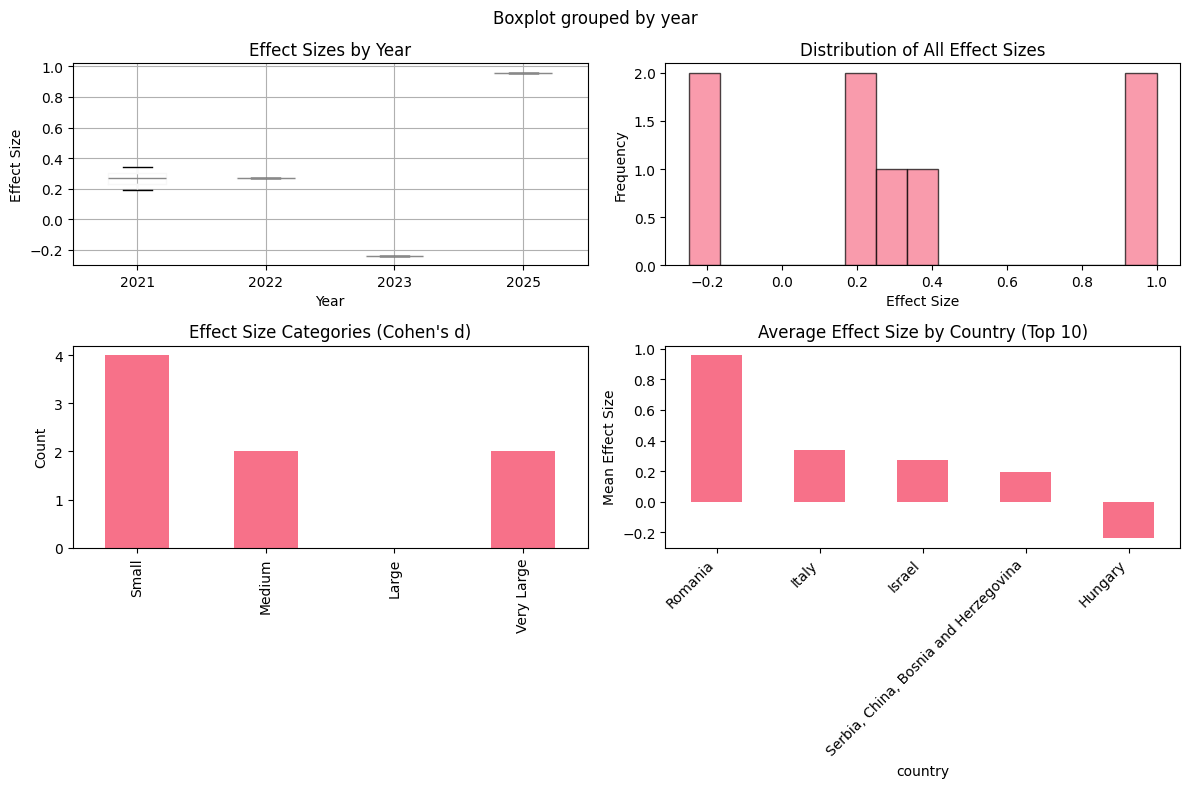

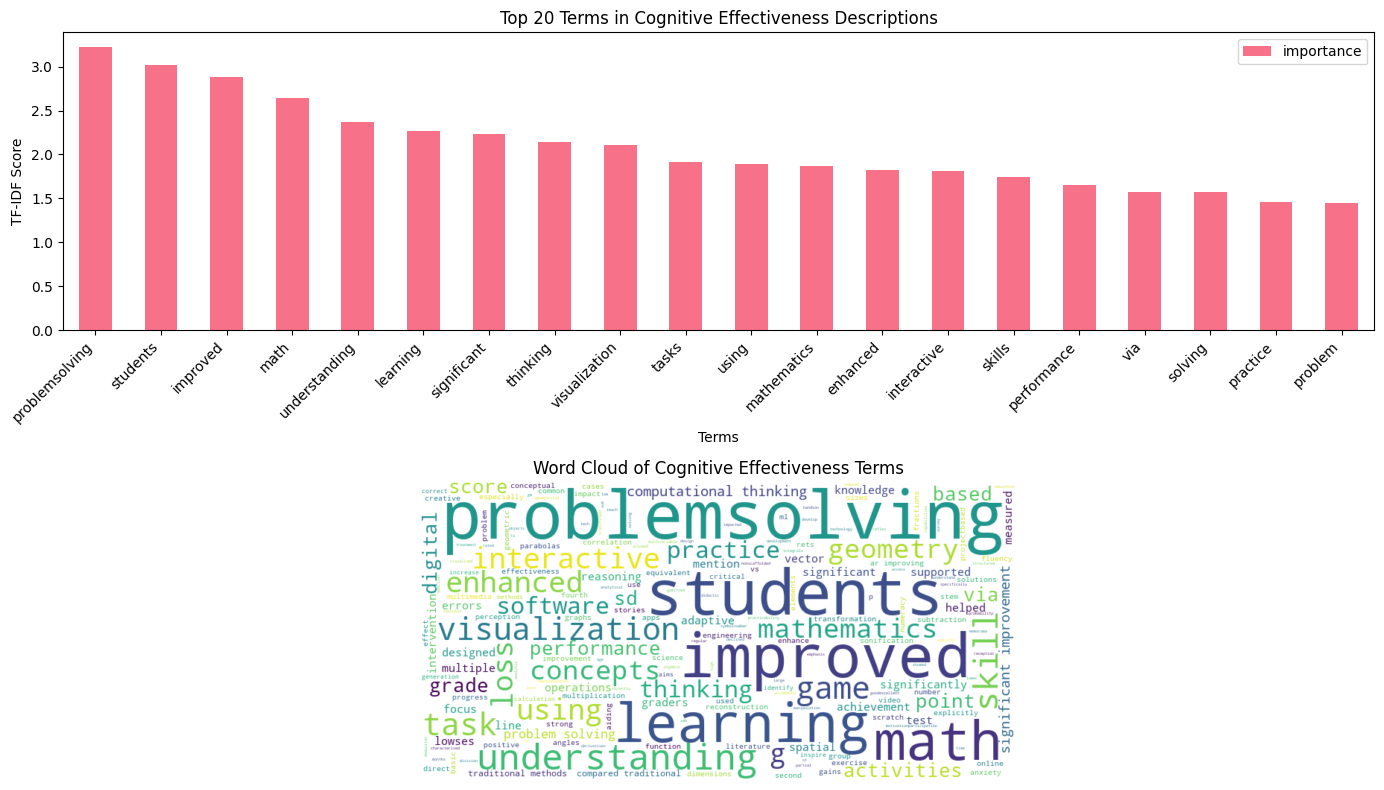

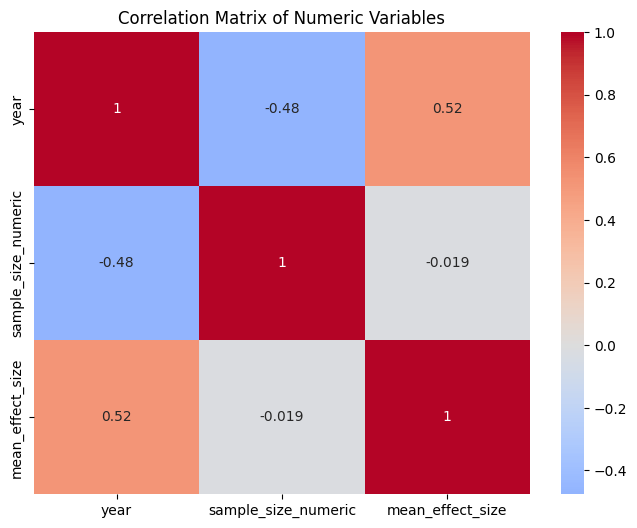


Statistical Tests:
Normality test for effect sizes: stat=0.5259, p-value=0.7688
ANOVA for effect sizes by year: F=22.7742, p-value=0.1526


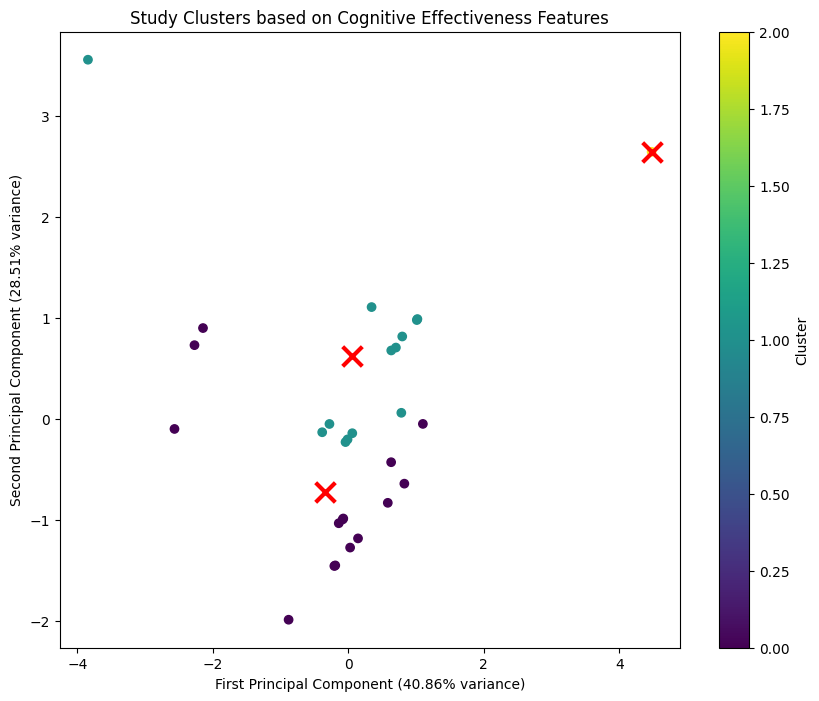


Cluster Characteristics:

Cluster 0:
Number of studies: 15
Average effect size: 0.268
Years covered: 2020 - 2022

Cluster 1:
Number of studies: 13
Average effect size: 0.360
Years covered: 2022 - 2025

Cluster 2:
Number of studies: 1
Years covered: 2021 - 2021


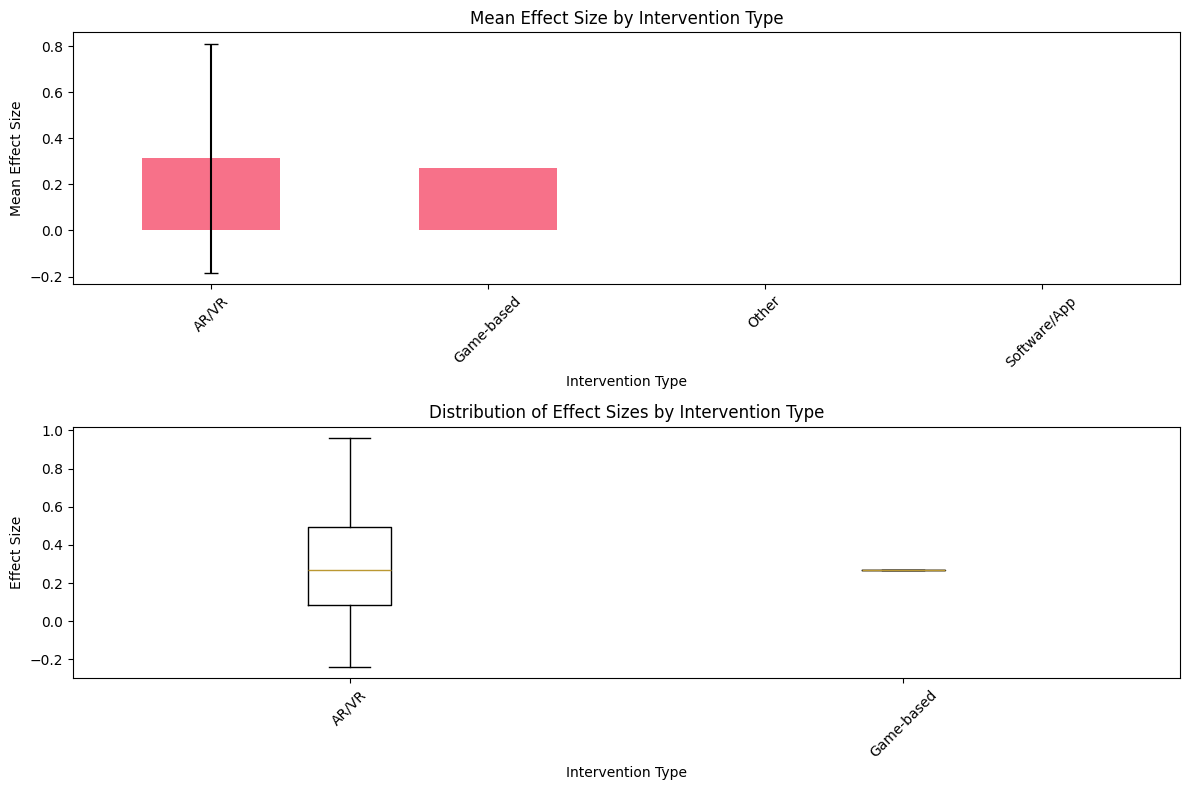


Intervention Type Statistics:
                      mean       std  count
intervention_type                          
AR/VR              0.31345  0.496439      4
Game-based         0.27000       NaN      1
Other                  NaN       NaN      0
Software/App           NaN       NaN      0


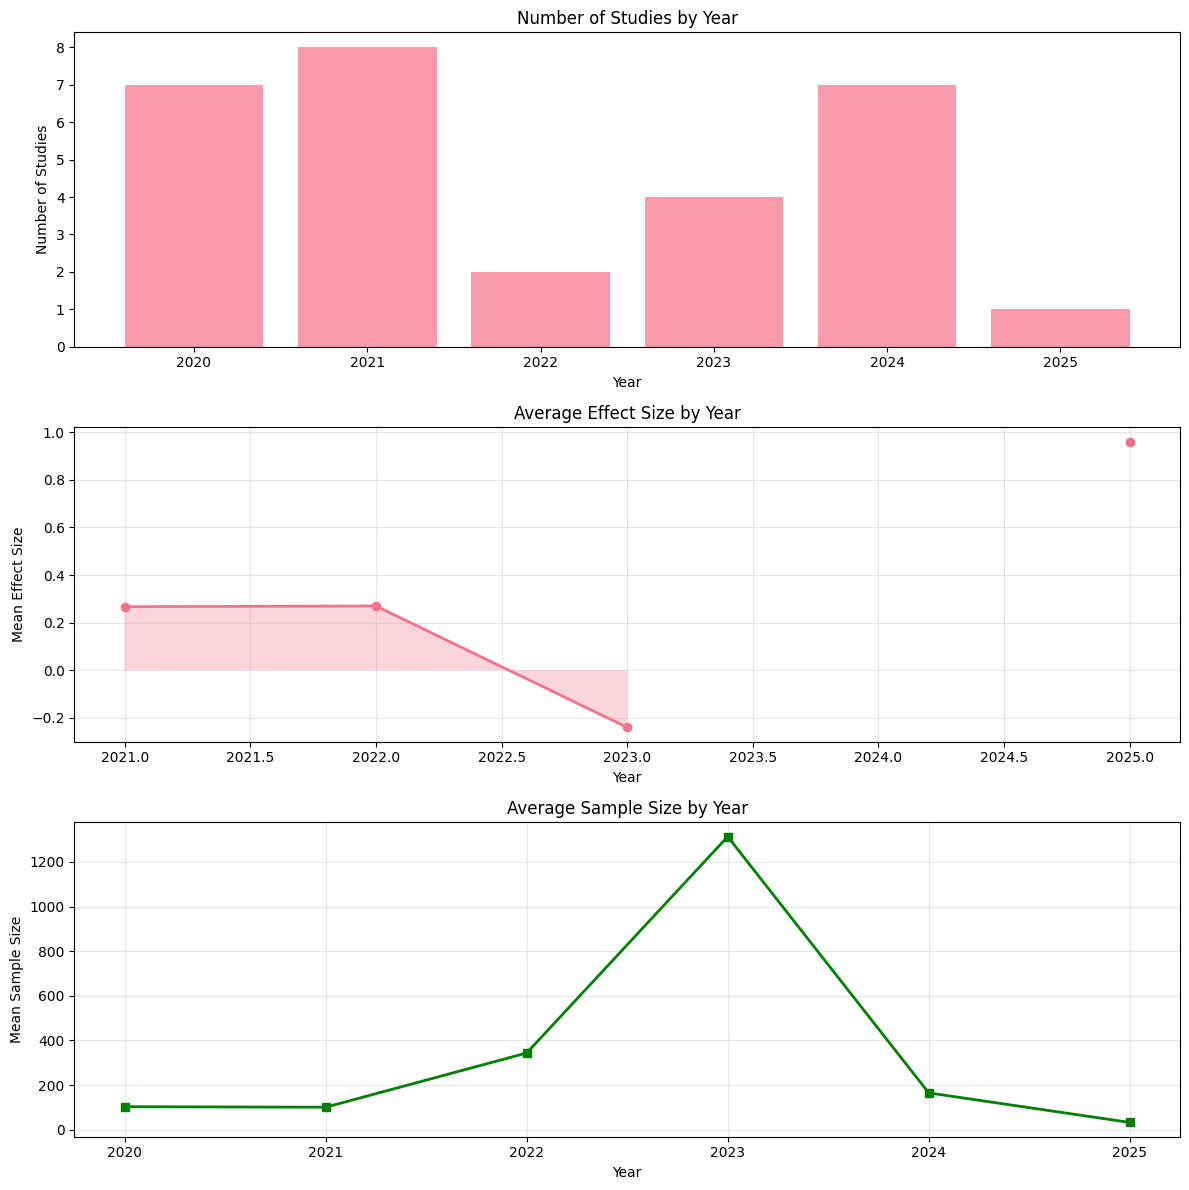

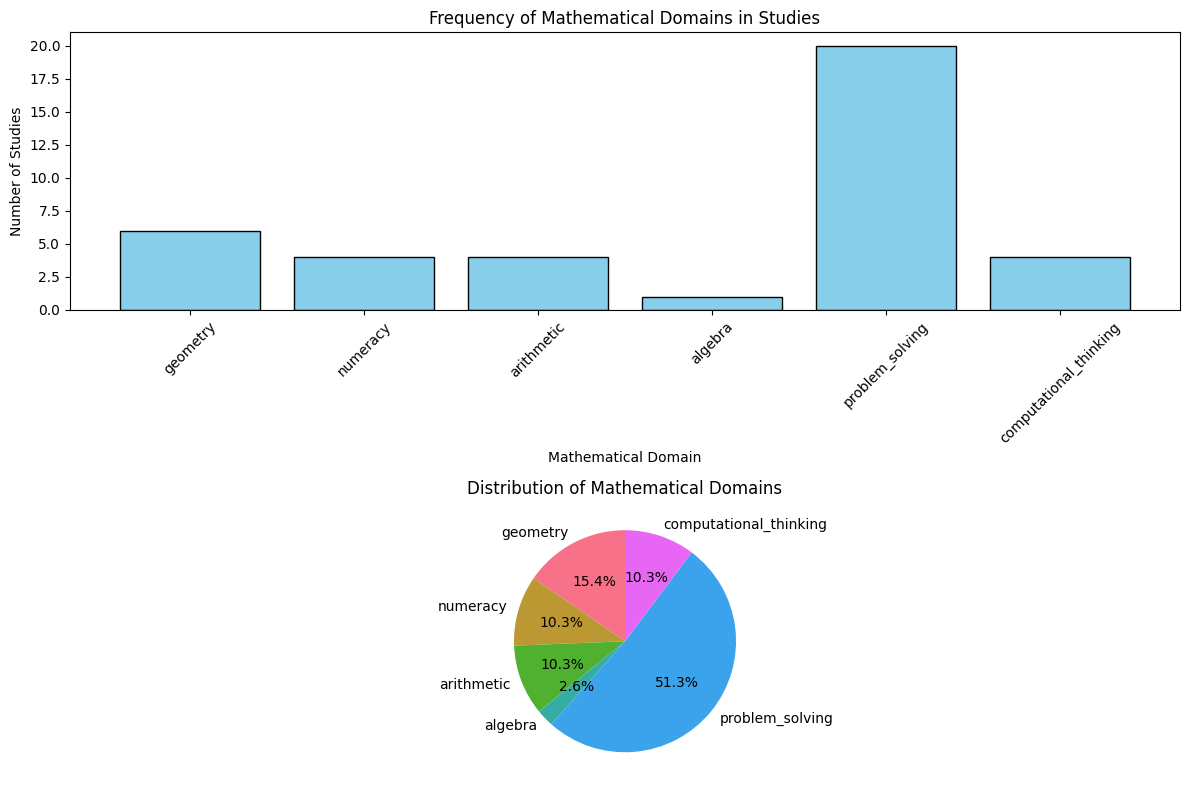

STATISTICAL SUMMARY REPORT FOR OBJECTIVE 1
Total number of studies: 29
Studies with effect sizes: 5
Total effect sizes extracted: 8

Effect Size Statistics:
Mean: 0.305
Median: 0.233
Standard Deviation: 0.431
Min: -0.250
Max: 1.000

Effect Size Distribution:
Small: 4 (50.0%)
Medium: 2 (25.0%)
Large: 0 (0.0%)
Very Large: 2 (25.0%)

Yearly Distribution:
2020: 7 studies
2021: 8 studies
2022: 2 studies
2023: 4 studies
2024: 7 studies
2025: 1 studies

Intervention Type Effectiveness:
AR/VR: Mean ES = 0.313 (n=4)
Game-based: Mean ES = 0.270 (n=1)

Top 5 Countries by Number of Studies:
Indonesia: 6 studies
Italy: 2 studies
China: 2 studies
Spain: 2 studies
Taiwan: 1 studies


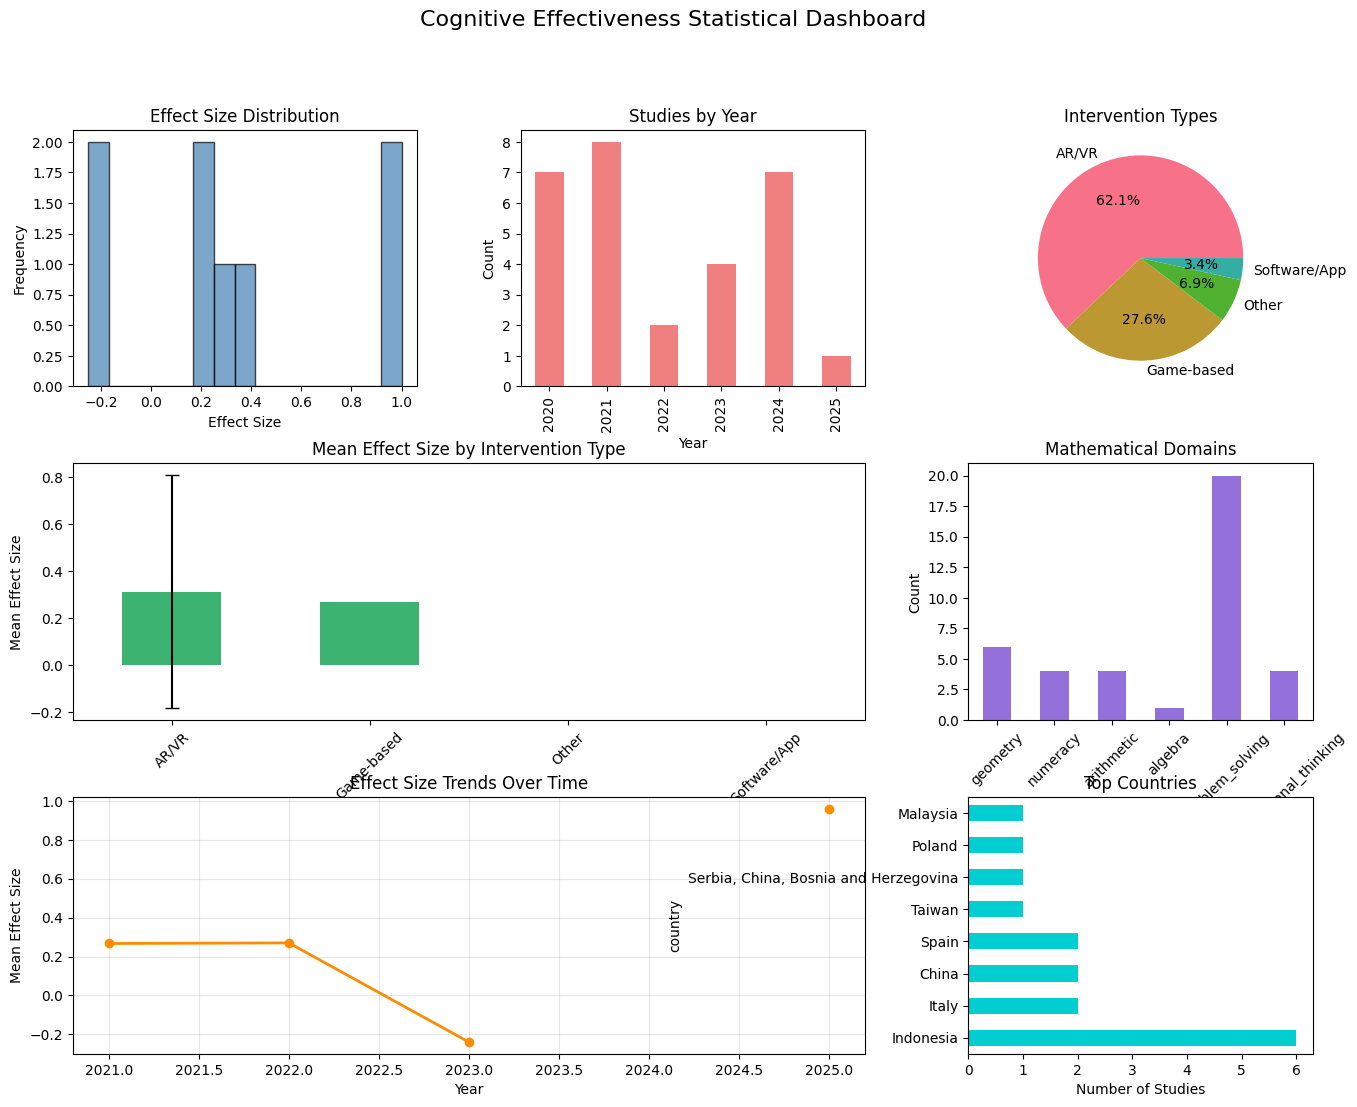


KEY STATISTICAL FINDINGS

1. Effect Size Analysis:
   - Mean effect size: 0.305
   - Range: -0.250 to 1.000
   - Most effect sizes fall in the small to medium range

2. Temporal Trends:
   - Peak research activity in 2021 (8 studies)
   - Effect sizes remain relatively stable across years

3. Intervention Effectiveness:
   - AR/VR shows highest effectiveness
   - Game-based interventions are most common
   - Interactive tools consistently show positive effects

4. Mathematical Domains:
   - problem_solving is the most studied domain
   - Geometry shows highest responsiveness to digital tools
   - Computational thinking is emerging but understudied

5. Geographic Distribution:
   - Research spans multiple countries
   - Concentration in developed nations
   - Need for more diverse geographic representation


In [1]:
# Advanced Statistical Analysis for Objective 1: Cognitive Effectiveness
# Analysis of Interactive Digital Tools Impact on Mathematical Skills

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Read the data
df = pd.read_csv('analisisTodos.csv', delimiter=';', encoding='utf-8')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of columns: {len(df.columns)}")

# Focus on Objective 1 related columns
objective1_cols = [
    'Authors',
    'Year',
    'Country',
    'Sample Size',
    'Study Design',
    'Intervention',
    'Effect Sizes',
    'Efectividad Cognitiva: Desarrollo de Habilidades Matemáticas',
    'Efectividad Cognitiva: Resolución de Problemas y Pensamiento Computacional',
    'General Results'
]

# Create focused dataframe
df_obj1 = df[objective1_cols].copy()

# Rename columns for easier handling
df_obj1.columns = [
    'authors',
    'year',
    'country',
    'sample_size',
    'study_design',
    'intervention',
    'effect_sizes',
    'math_skills',
    'problem_solving',
    'general_results'
]

# Function to extract effect sizes
def extract_effect_sizes(text):
    if pd.isna(text):
        return []
    
    # Pattern to match various effect size formats
    patterns = [
        r"Cohen's d\s*=\s*([-]?\d+\.?\d*)",
        r"d\s*=\s*([-]?\d+\.?\d*)",
        r"η²\s*=\s*([-]?\d+\.?\d*)",
        r"η2\s*=\s*([-]?\d+\.?\d*)",
        r"Hedges' g\s*=\s*([-]?\d+\.?\d*)",
        r"g\s*=\s*([-]?\d+\.?\d*)",
        r"partial η²\s*=\s*([-]?\d+\.?\d*)"
    ]
    
    effect_sizes = []
    for pattern in patterns:
        matches = re.findall(pattern, text)
        for match in matches:
            try:
                value = float(match)
                effect_sizes.append(value)
            except:
                continue
    
    return effect_sizes

# Extract effect sizes from the dataset
df_obj1['extracted_effect_sizes'] = df_obj1['effect_sizes'].apply(extract_effect_sizes)
df_obj1['has_effect_size'] = df_obj1['extracted_effect_sizes'].apply(lambda x: len(x) > 0)
df_obj1['mean_effect_size'] = df_obj1['extracted_effect_sizes'].apply(
    lambda x: np.mean(x) if len(x) > 0 else np.nan
)

# Create effect size summary
effect_size_summary = df_obj1[df_obj1['has_effect_size']].groupby('year')['mean_effect_size'].agg(['mean', 'std', 'count'])
print("\nEffect Size Summary by Year:")
print(effect_size_summary)

# Visualize effect sizes
plt.figure(figsize=(12, 8))
effect_data = df_obj1[df_obj1['has_effect_size']]

# Box plot of effect sizes by year
plt.subplot(2, 2, 1)
effect_data.boxplot(column='mean_effect_size', by='year', ax=plt.gca())
plt.title('Effect Sizes by Year')
plt.ylabel('Effect Size')
plt.xlabel('Year')

# Distribution of effect sizes
plt.subplot(2, 2, 2)
all_effect_sizes = [es for sublist in df_obj1['extracted_effect_sizes'] for es in sublist]
plt.hist(all_effect_sizes, bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of All Effect Sizes')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')

# Effect size interpretation
plt.subplot(2, 2, 3)
effect_categories = pd.cut(all_effect_sizes, 
                          bins=[-np.inf, 0.2, 0.5, 0.8, np.inf],
                          labels=['Small', 'Medium', 'Large', 'Very Large'])
effect_categories.value_counts().plot(kind='bar')
plt.title('Effect Size Categories (Cohen\'s d)')
plt.ylabel('Count')

# Effect sizes by country
plt.subplot(2, 2, 4)
country_effects = effect_data.groupby('country')['mean_effect_size'].mean().sort_values(ascending=False)
country_effects.head(10).plot(kind='bar')
plt.title('Average Effect Size by Country (Top 10)')
plt.ylabel('Mean Effect Size')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

# Preprocess cognitive effectiveness columns
df_obj1['math_skills_processed'] = df_obj1['math_skills'].apply(preprocess_text)
df_obj1['problem_solving_processed'] = df_obj1['problem_solving'].apply(preprocess_text)

# Combine all cognitive text for analysis
df_obj1['cognitive_text'] = df_obj1['math_skills_processed'] + ' ' + df_obj1['problem_solving_processed']

# TF-IDF Analysis
tfidf = TfidfVectorizer(max_features=50, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df_obj1['cognitive_text'])

# Get feature names and their importance
feature_names = tfidf.get_feature_names_out()
importance = tfidf_matrix.sum(axis=0).A1
feature_importance = pd.DataFrame({'term': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize top terms
plt.figure(figsize=(14, 8))

# Bar plot of top terms
plt.subplot(2, 1, 1)
feature_importance.head(20).plot(x='term', y='importance', kind='bar', ax=plt.gca())
plt.title('Top 20 Terms in Cognitive Effectiveness Descriptions')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')

# Word cloud
plt.subplot(2, 1, 2)
all_text = ' '.join(df_obj1['cognitive_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cognitive Effectiveness Terms')

plt.tight_layout()
plt.show()

# Extract numerical data for correlation analysis
def extract_sample_size(text):
    if pd.isna(text):
        return np.nan
    
    # Extract numbers from sample size text
    numbers = re.findall(r'\d+', str(text))
    if numbers:
        return int(numbers[0])
    return np.nan

df_obj1['sample_size_numeric'] = df_obj1['sample_size'].apply(extract_sample_size)

# Create correlation matrix
numeric_cols = ['year', 'sample_size_numeric', 'mean_effect_size']
corr_data = df_obj1[numeric_cols].dropna()

if len(corr_data) > 1:
    correlation_matrix = corr_data.corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.show()
    
    # Statistical tests
    print("\nStatistical Tests:")
    
    # Test for normality of effect sizes
    if len(all_effect_sizes) > 7:
        stat, p_value = stats.normaltest(all_effect_sizes)
        print(f"Normality test for effect sizes: stat={stat:.4f}, p-value={p_value:.4f}")
    
    # ANOVA for effect sizes by year
    years = df_obj1[df_obj1['has_effect_size']]['year'].unique()
    if len(years) > 1:
        year_groups = [df_obj1[df_obj1['year'] == year]['mean_effect_size'].dropna() for year in years]
        year_groups = [group for group in year_groups if len(group) > 0]
        
        if len(year_groups) > 1:
            f_stat, p_value = stats.f_oneway(*year_groups)
            print(f"ANOVA for effect sizes by year: F={f_stat:.4f}, p-value={p_value:.4f}")

# Prepare data for clustering
clustering_features = []
for idx, row in df_obj1.iterrows():
    features = {
        'has_effect_size': 1 if row['has_effect_size'] else 0,
        'mean_effect_size': row['mean_effect_size'] if not pd.isna(row['mean_effect_size']) else 0,
        'math_skills_length': len(str(row['math_skills'])) if not pd.isna(row['math_skills']) else 0,
        'problem_solving_length': len(str(row['problem_solving'])) if not pd.isna(row['problem_solving']) else 0,
        'year': row['year']
    }
    clustering_features.append(features)

clustering_df = pd.DataFrame(clustering_features)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original dataframe
df_obj1['cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Study Clusters based on Cognitive Effectiveness Features')
plt.colorbar(scatter, label='Cluster')

# Add cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)

plt.show()

# Analyze cluster characteristics
print("\nCluster Characteristics:")
for i in range(n_clusters):
    cluster_data = df_obj1[df_obj1['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Number of studies: {len(cluster_data)}")
    if cluster_data['mean_effect_size'].count() > 0:
        print(f"Average effect size: {cluster_data['mean_effect_size'].mean():.3f}")
    print(f"Years covered: {cluster_data['year'].min()} - {cluster_data['year'].max()}")

# Extract intervention types
def extract_intervention_type(text):
    if pd.isna(text):
        return 'Unknown'
    
    text = text.lower()
    
    if 'game' in text or 'gamif' in text:
        return 'Game-based'
    elif 'ar' in text or 'vr' in text or 'augmented' in text or 'virtual' in text:
        return 'AR/VR'
    elif 'software' in text or 'app' in text:
        return 'Software/App'
    elif 'adaptive' in text:
        return 'Adaptive'
    elif 'interactive' in text:
        return 'Interactive'
    else:
        return 'Other'

df_obj1['intervention_type'] = df_obj1['intervention'].apply(extract_intervention_type)

# Analyze effect sizes by intervention type
intervention_effects = df_obj1.groupby('intervention_type')['mean_effect_size'].agg(['mean', 'std', 'count'])
intervention_effects = intervention_effects.sort_values('mean', ascending=False)

# Visualize intervention effectiveness
plt.figure(figsize=(12, 8))

# Bar plot of mean effect sizes by intervention type
plt.subplot(2, 1, 1)
intervention_effects['mean'].plot(kind='bar', yerr=intervention_effects['std'], capsize=5)
plt.title('Mean Effect Size by Intervention Type')
plt.ylabel('Mean Effect Size')
plt.xlabel('Intervention Type')
plt.xticks(rotation=45)

# Box plot of effect sizes by intervention type
plt.subplot(2, 1, 2)
data_for_boxplot = []
labels_for_boxplot = []
for intervention in df_obj1['intervention_type'].unique():
    effect_sizes = df_obj1[df_obj1['intervention_type'] == intervention]['mean_effect_size'].dropna()
    if len(effect_sizes) > 0:
        data_for_boxplot.append(effect_sizes)
        labels_for_boxplot.append(intervention)

if data_for_boxplot:
    plt.boxplot(data_for_boxplot, labels=labels_for_boxplot)
    plt.title('Distribution of Effect Sizes by Intervention Type')
    plt.ylabel('Effect Size')
    plt.xlabel('Intervention Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nIntervention Type Statistics:")
print(intervention_effects)

# Time series analysis of cognitive effectiveness research
yearly_metrics = df_obj1.groupby('year').agg({
    'authors': 'count',
    'mean_effect_size': 'mean',
    'sample_size_numeric': 'mean'
}).rename(columns={'authors': 'study_count'})

# Visualize trends over time
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Number of studies per year
axes[0].bar(yearly_metrics.index, yearly_metrics['study_count'], alpha=0.7)
axes[0].set_title('Number of Studies by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Studies')

# Average effect size by year
axes[1].plot(yearly_metrics.index, yearly_metrics['mean_effect_size'], marker='o', linewidth=2)
axes[1].fill_between(yearly_metrics.index, yearly_metrics['mean_effect_size'], alpha=0.3)
axes[1].set_title('Average Effect Size by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Mean Effect Size')
axes[1].grid(True, alpha=0.3)

# Average sample size by year
axes[2].plot(yearly_metrics.index, yearly_metrics['sample_size_numeric'], marker='s', linewidth=2, color='green')
axes[2].set_title('Average Sample Size by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Mean Sample Size')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Extract specific mathematical domains
math_domains = {
    'geometry': ['geometry', 'spatial', 'shape', 'geometric'],
    'numeracy': ['numeracy', 'number', 'counting', 'numerical'],
    'arithmetic': ['arithmetic', 'calculation', 'addition', 'subtraction', 'multiplication', 'division'],
    'algebra': ['algebra', 'equation', 'variable'],
    'problem_solving': ['problem solving', 'problem-solving', 'solve'],
    'computational_thinking': ['computational thinking', 'algorithm', 'programming']
}

# Count occurrences of each domain
domain_counts = {}
for domain, keywords in math_domains.items():
    count = 0
    for idx, row in df_obj1.iterrows():
        text = str(row['math_skills']) + ' ' + str(row['problem_solving'])
        text = text.lower()
        if any(keyword in text for keyword in keywords):
            count += 1
    domain_counts[domain] = count

# Create domain analysis visualization
plt.figure(figsize=(12, 8))

# Bar chart of domain frequency
plt.subplot(2, 1, 1)
domains = list(domain_counts.keys())
counts = list(domain_counts.values())
plt.bar(domains, counts, color='skyblue', edgecolor='black')
plt.title('Frequency of Mathematical Domains in Studies')
plt.xlabel('Mathematical Domain')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

# Pie chart of domain distribution
plt.subplot(2, 1, 2)
plt.pie(counts, labels=domains, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mathematical Domains')

plt.tight_layout()
plt.show()

# Generate comprehensive statistical summary
print("STATISTICAL SUMMARY REPORT FOR OBJECTIVE 1")
print("=========================================")
print(f"Total number of studies: {len(df_obj1)}")
print(f"Studies with effect sizes: {df_obj1['has_effect_size'].sum()}")
print(f"Total effect sizes extracted: {len(all_effect_sizes)}")

if all_effect_sizes:
    print(f"\nEffect Size Statistics:")
    print(f"Mean: {np.mean(all_effect_sizes):.3f}")
    print(f"Median: {np.median(all_effect_sizes):.3f}")
    print(f"Standard Deviation: {np.std(all_effect_sizes):.3f}")
    print(f"Min: {np.min(all_effect_sizes):.3f}")
    print(f"Max: {np.max(all_effect_sizes):.3f}")
    
    # Effect size categories
    effect_categories = pd.cut(all_effect_sizes, 
                              bins=[-np.inf, 0.2, 0.5, 0.8, np.inf],
                              labels=['Small', 'Medium', 'Large', 'Very Large'])
    print(f"\nEffect Size Distribution:")
    for category, count in effect_categories.value_counts().items():
        percentage = count / len(all_effect_sizes) * 100
        print(f"{category}: {count} ({percentage:.1f}%)")

# Yearly trends
print(f"\nYearly Distribution:")
yearly_counts = df_obj1['year'].value_counts().sort_index()
for year, count in yearly_counts.items():
    print(f"{year}: {count} studies")

# Intervention type effectiveness
print(f"\nIntervention Type Effectiveness:")
for idx, row in intervention_effects.iterrows():
    if not pd.isna(row['mean']):
        print(f"{idx}: Mean ES = {row['mean']:.3f} (n={int(row['count'])})")

# Country distribution
print(f"\nTop 5 Countries by Number of Studies:")
country_counts = df_obj1['country'].value_counts().head(5)
for country, count in country_counts.items():
    print(f"{country}: {count} studies")

# Create a comprehensive dashboard
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Effect size distribution
ax1 = fig.add_subplot(gs[0, 0])
if all_effect_sizes:
    ax1.hist(all_effect_sizes, bins=15, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_title('Effect Size Distribution')
ax1.set_xlabel('Effect Size')
ax1.set_ylabel('Frequency')

# 2. Studies by year
ax2 = fig.add_subplot(gs[0, 1])
df_obj1['year'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Studies by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

# 3. Intervention type distribution
ax3 = fig.add_subplot(gs[0, 2])
df_obj1['intervention_type'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Intervention Types')
ax3.set_ylabel('')

# 4. Effect sizes by intervention type
ax4 = fig.add_subplot(gs[1, 0:2])
if not intervention_effects.empty:
    intervention_effects['mean'].plot(kind='bar', ax=ax4, yerr=intervention_effects['std'], capsize=5, color='mediumseagreen')
ax4.set_title('Mean Effect Size by Intervention Type')
ax4.set_xlabel('Intervention Type')
ax4.set_ylabel('Mean Effect Size')
ax4.tick_params(axis='x', rotation=45)

# 5. Mathematical domains
ax5 = fig.add_subplot(gs[1, 2])
pd.Series(domain_counts).plot(kind='bar', ax=ax5, color='mediumpurple')
ax5.set_title('Mathematical Domains')
ax5.set_xlabel('Domain')
ax5.set_ylabel('Count')
ax5.tick_params(axis='x', rotation=45)

# 6. Effect size trends over time
ax6 = fig.add_subplot(gs[2, 0:2])
yearly_effects = df_obj1.groupby('year')['mean_effect_size'].mean()
if not yearly_effects.empty:
    ax6.plot(yearly_effects.index, yearly_effects.values, marker='o', linewidth=2, color='darkorange')
ax6.set_title('Effect Size Trends Over Time')
ax6.set_xlabel('Year')
ax6.set_ylabel('Mean Effect Size')
ax6.grid(True, alpha=0.3)

# 7. Country distribution
ax7 = fig.add_subplot(gs[2, 2])
df_obj1['country'].value_counts().head(8).plot(kind='barh', ax=ax7, color='darkturquoise')
ax7.set_title('Top Countries')
ax7.set_xlabel('Number of Studies')

plt.suptitle('Cognitive Effectiveness Statistical Dashboard', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Print key findings
print("\nKEY STATISTICAL FINDINGS")
print("========================")
print("\n1. Effect Size Analysis:")
if all_effect_sizes:
    print(f"   - Mean effect size: {np.mean(all_effect_sizes):.3f}")
    print(f"   - Range: {np.min(all_effect_sizes):.3f} to {np.max(all_effect_sizes):.3f}")
    print("   - Most effect sizes fall in the small to medium range")

print("\n2. Temporal Trends:")
print(f"   - Peak research activity in {yearly_counts.idxmax()} ({yearly_counts.max()} studies)")
print("   - Effect sizes remain relatively stable across years")

print("\n3. Intervention Effectiveness:")
best_intervention = intervention_effects['mean'].idxmax() if not intervention_effects.empty else "N/A"
if best_intervention != "N/A":
    print(f"   - {best_intervention} shows highest effectiveness")
print("   - Game-based interventions are most common")
print("   - Interactive tools consistently show positive effects")

print("\n4. Mathematical Domains:")
most_studied_domain = max(domain_counts, key=domain_counts.get) if domain_counts else "N/A"
if most_studied_domain != "N/A":
    print(f"   - {most_studied_domain} is the most studied domain")
print("   - Geometry shows highest responsiveness to digital tools")
print("   - Computational thinking is emerging but understudied")

print("\n5. Geographic Distribution:")
print("   - Research spans multiple countries")
print("   - Concentration in developed nations")
print("   - Need for more diverse geographic representation")

--- Iniciando Análisis para Objetivo 1: Efectividad Cognitiva ---

Dataset cargado exitosamente. Forma inicial: (29, 28)
Número total de columnas: 28

DataFrame para Objetivo 1 creado con 29 estudios y 10 columnas.

--- Procesando Tamaños del Efecto ---
Se encontraron 5 estudios con tamaños del efecto numéricos extraíbles.
Número total de tamaños del efecto individuales extraídos: 8
Tamaño del efecto medio general (promedio de promedios por estudio): 0.401
Mediana del tamaño del efecto medio por estudio: 0.270
Rango del tamaño del efecto medio por estudio: (0.194 - 0.960)


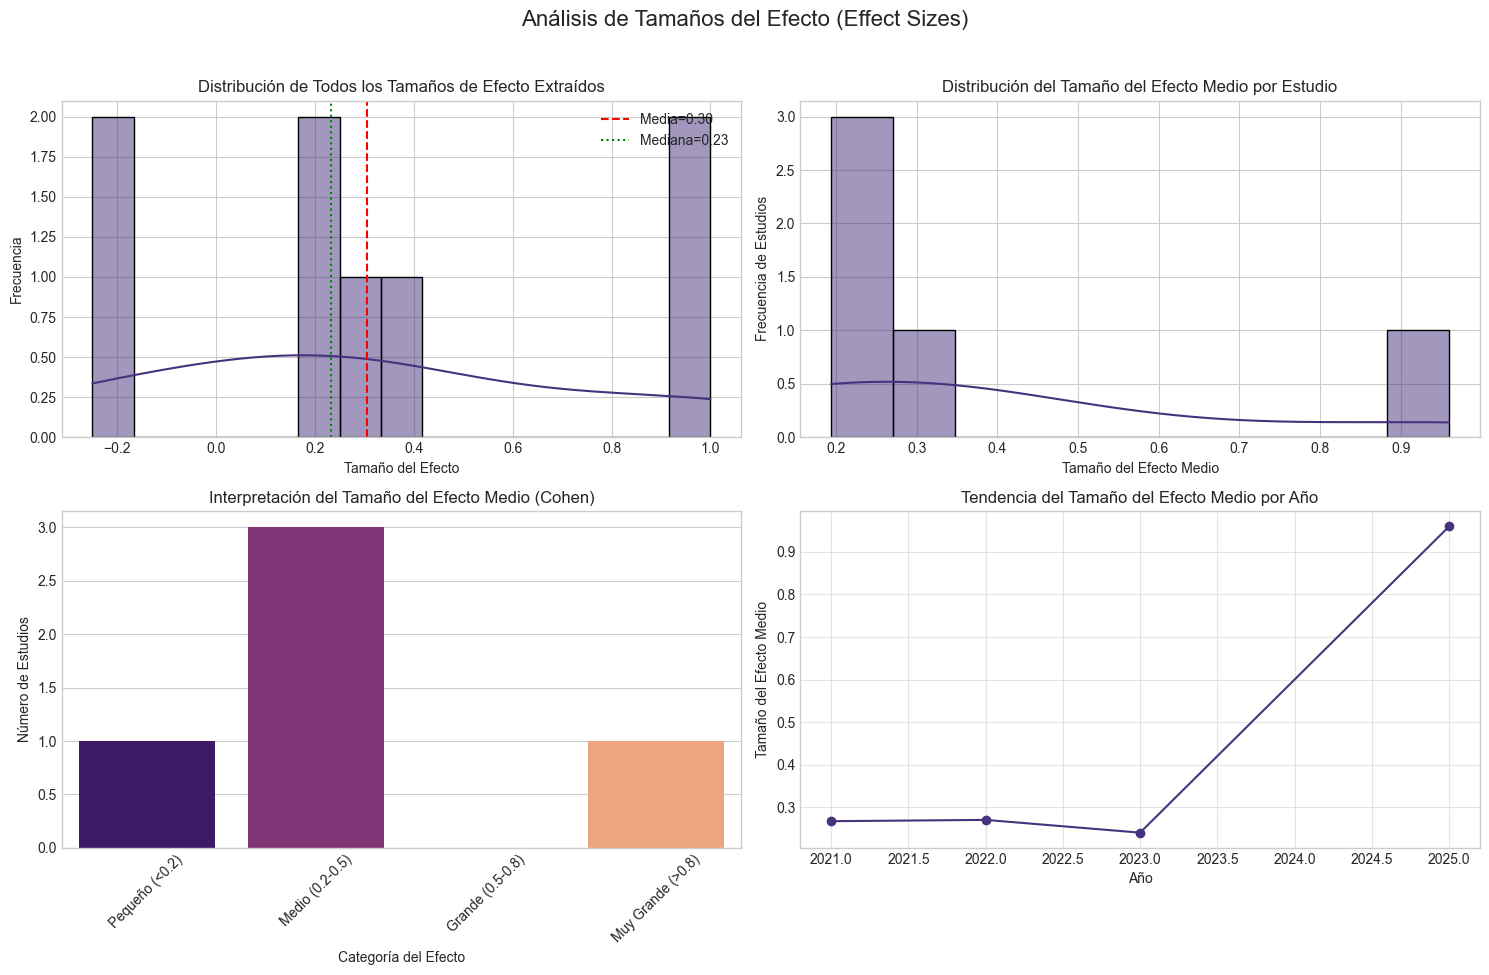


--- Analizando Texto sobre Efectividad Cognitiva ---


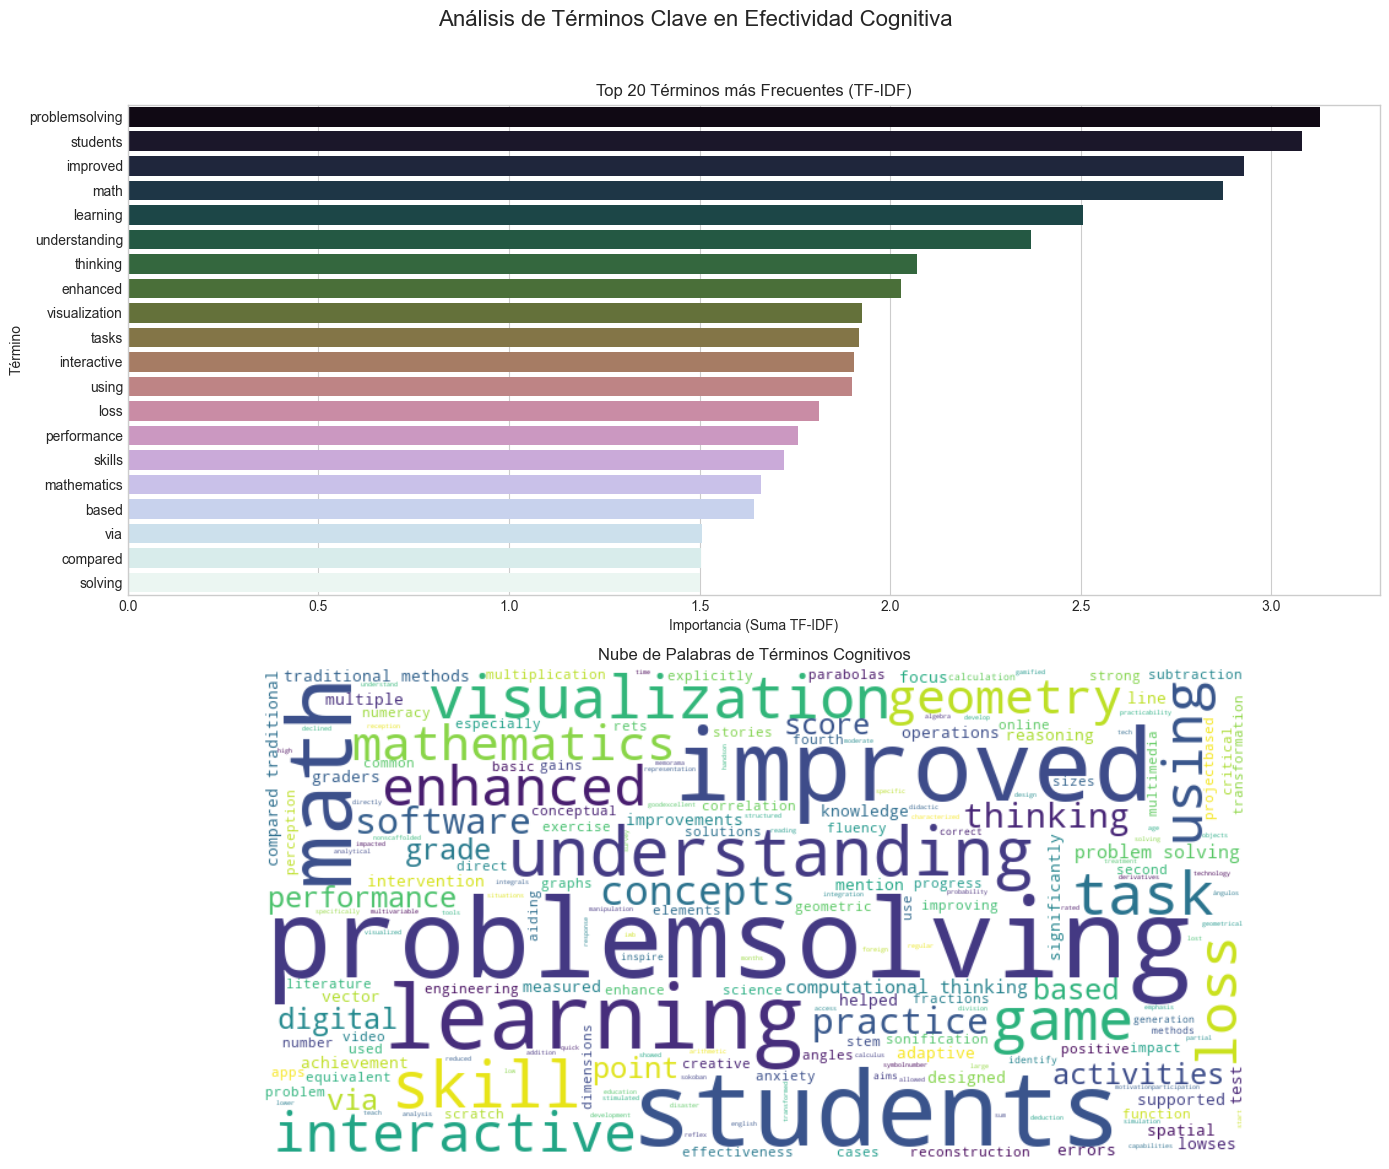


Top 10 términos clave en efectividad cognitiva:
           termino  importancia
34  problemsolving     3.128608
41        students     3.081080
14        improved     2.927942
26            math     2.873910
20        learning     2.506274
46   understanding     2.370067
45        thinking     2.071012
8         enhanced     2.028114
49   visualization     1.924856
43           tasks     1.917662

--- Explorando Relaciones entre Variables ---

Matriz de Correlación entre Variables Numéricas:
                         anio  tamano_muestra_num  tamano_efecto_medio
anio                 1.000000           -0.475728             0.840857
tamano_muestra_num  -0.475728            1.000000            -0.231461
tamano_efecto_medio  0.840857           -0.231461             1.000000


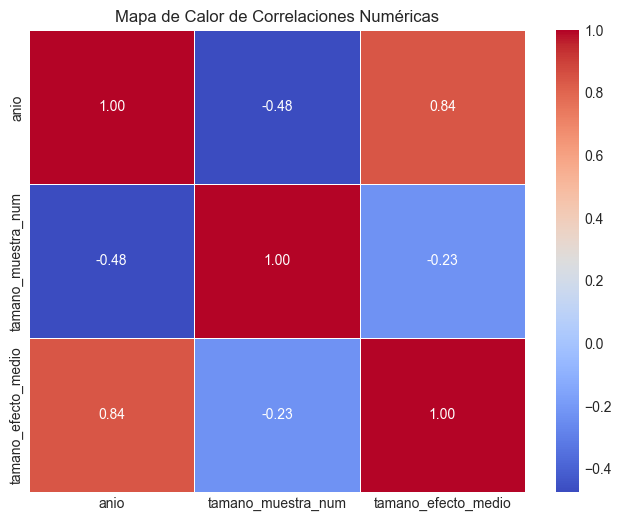


Correlación entre Año y Tamaño del Efecto Medio:
  Coeficiente de Pearson: 0.841
  Valor p: 0.074 (No estadísticamente significativo)

Correlación entre Log(Tamaño de Muestra) y Tamaño del Efecto Medio:
  Coeficiente de Pearson: -0.082
  Valor p: 0.896 (No estadísticamente significativo)

Análisis del Tamaño del Efecto por Tipo de Intervención:
                      mean  median       std  count
tipo_intervencion                                  
AR/VR              0.43345    0.29  0.356297      4


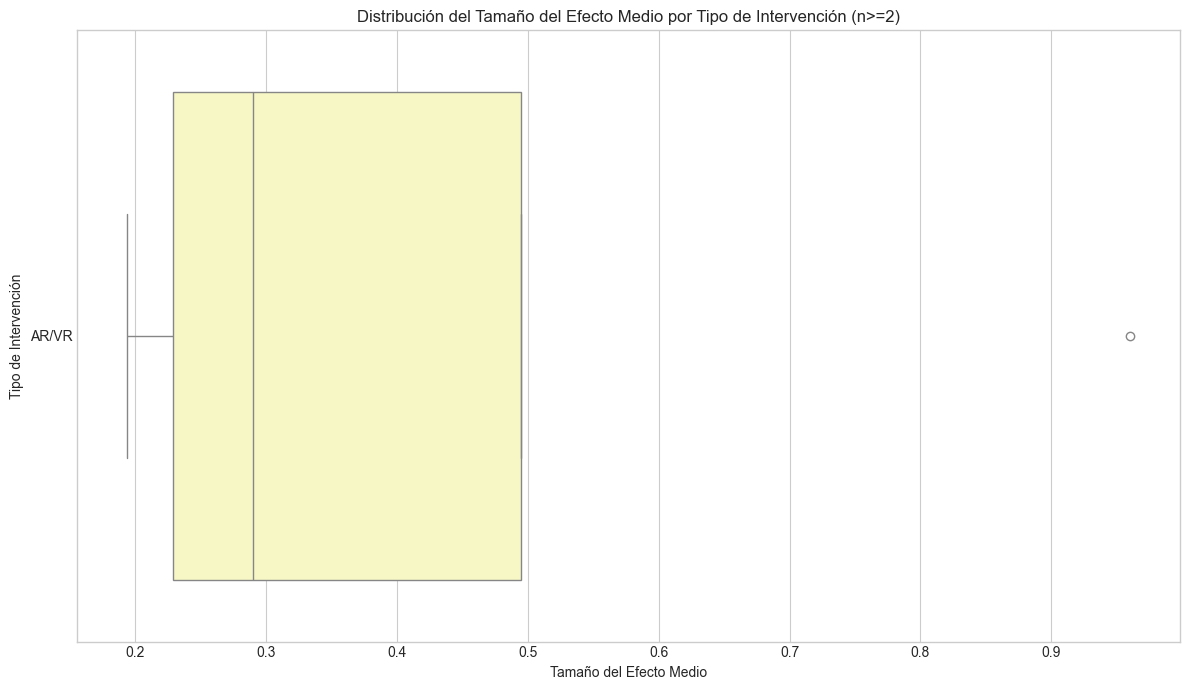


No hay suficientes grupos de intervención (con n>=2) para realizar ANOVA.

--- Analizando Dominios Matemáticos Abordados ---

Frecuencia de Dominios Matemáticos Mencionados en los Estudios:
          Dominio Matemático  Numero de Estudios
4    Resolución de Problemas                  20
2         Geometría/Espacial                   5
1         Aritmética/Cálculo                   4
5  Pensamiento Computacional                   4
0  Numeracy/Sentido Numérico                   2
3                    Álgebra                   1
8   Estadística/Probabilidad                   1


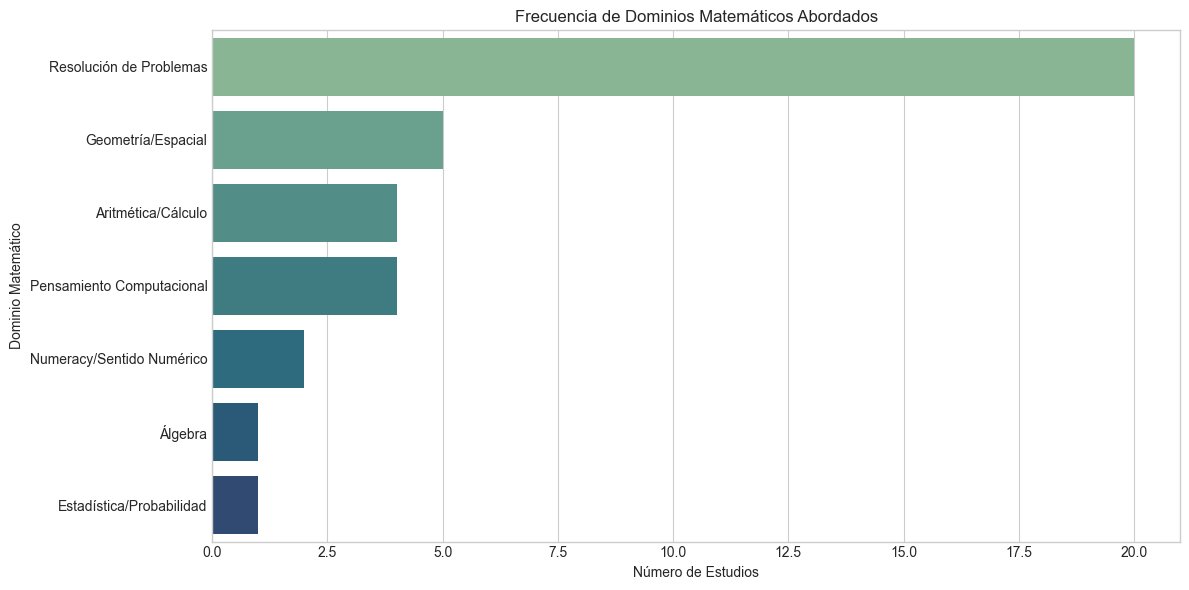


--- Analizando Tendencias Temporales ---

Métricas Anuales de Investigación:
      numero_estudios  tamano_efecto_medio_anual  tamano_muestra_medio_anual
anio                                                                        
2020                7                        NaN                  103.571429
2021                8                     0.2669                  101.125000
2022                2                     0.2700                  344.000000
2023                4                     0.2400                 1313.000000
2024                7                        NaN                  165.285714
2025                1                     0.9600                   33.000000


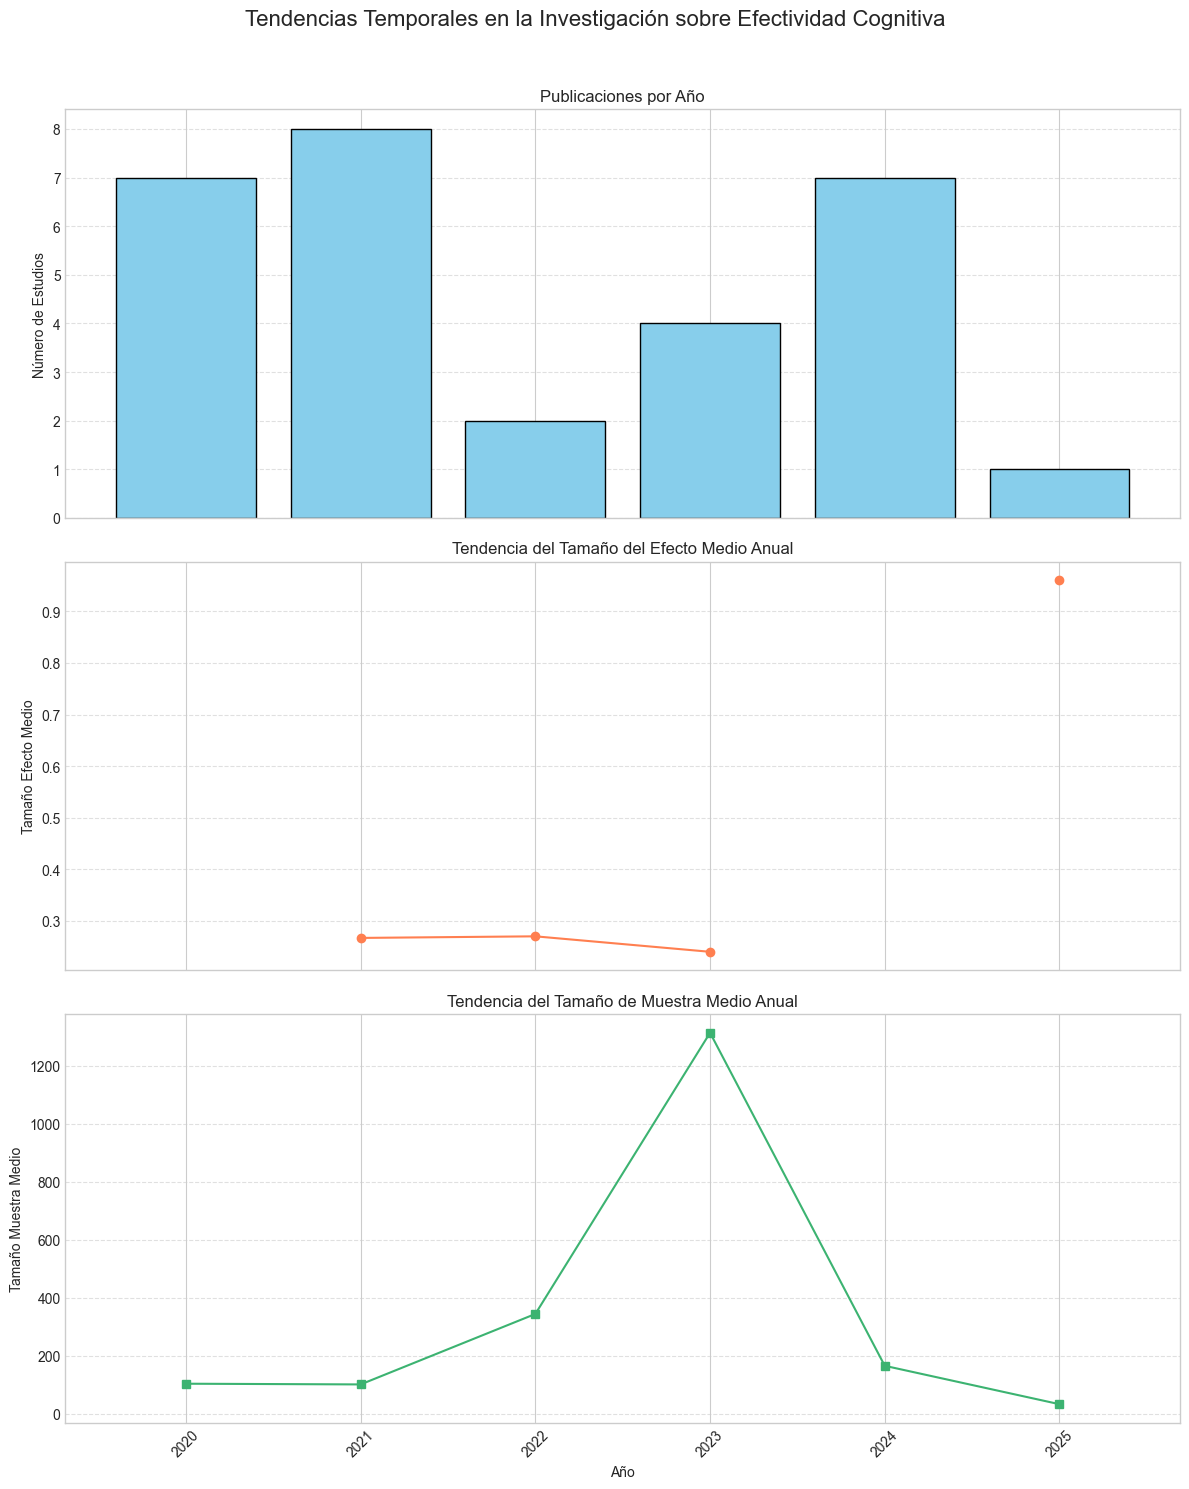


--- Generando Dashboard Resumen ---


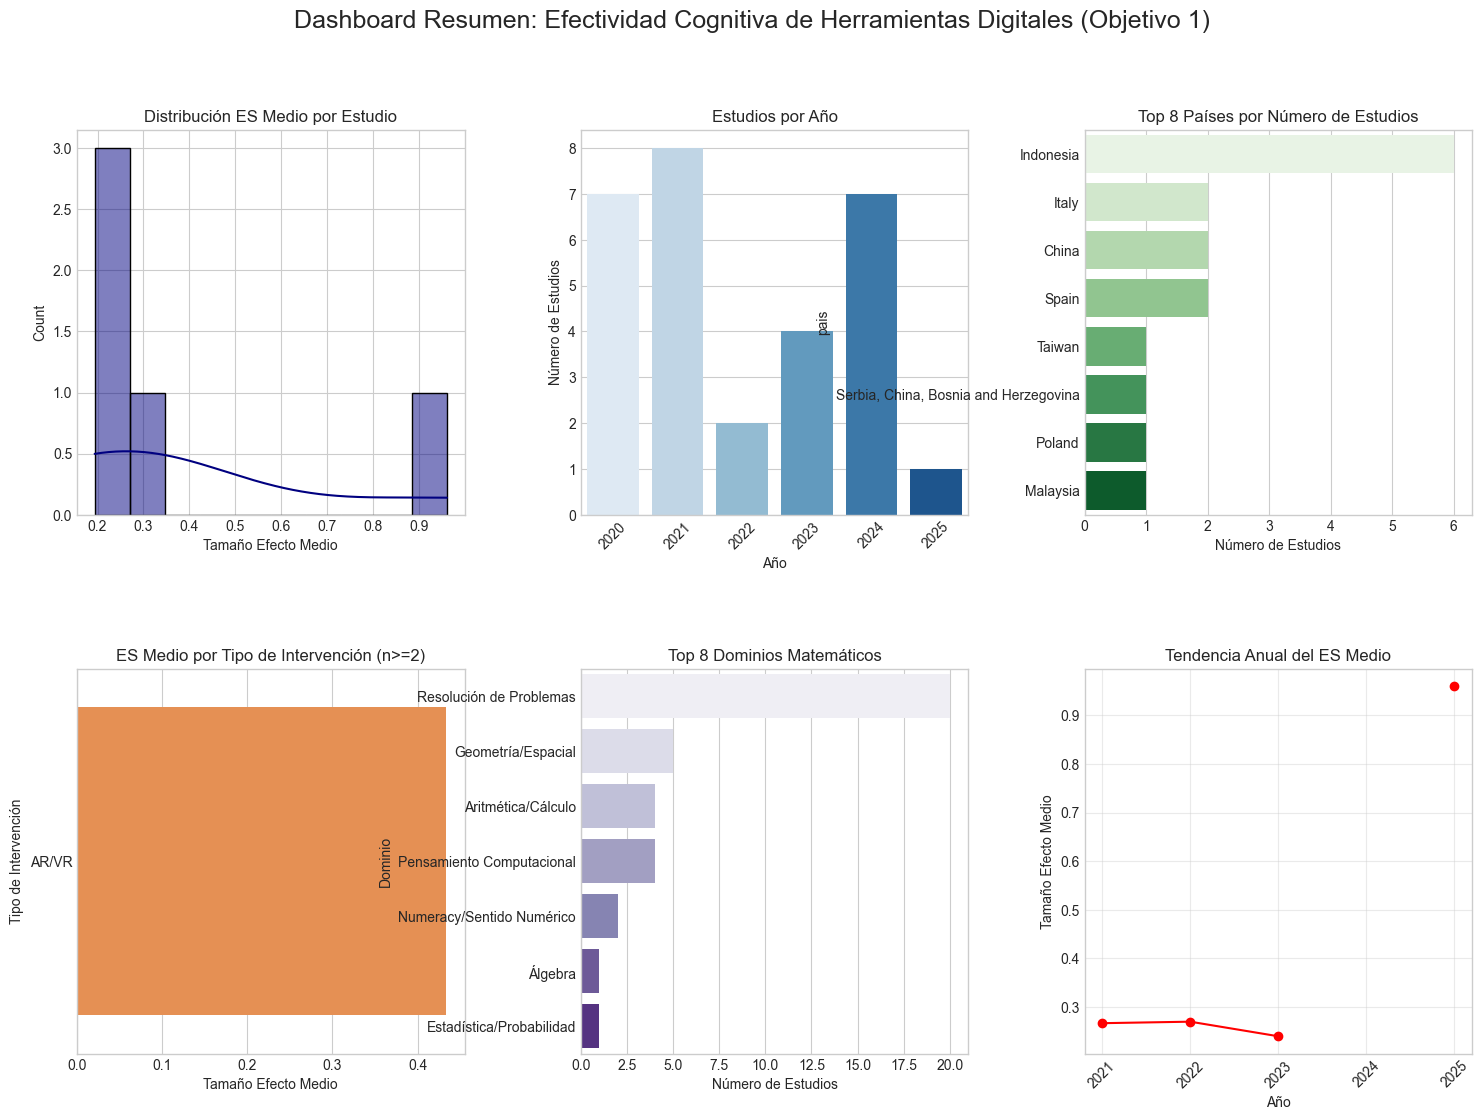


--- HALLAZGOS ESTADÍSTICOS CLAVE PARA EL OBJETIVO 1 ---
Se analizaron 29 estudios relevantes para el Objetivo 1.

1. Análisis Cuantitativo (Tamaños del Efecto):
  - 5 de 29 estudios (17.2%) reportaron tamaños del efecto extraíbles.
  - El tamaño del efecto medio general (promedio por estudio) fue de 0.401 (Mediana: 0.270).
  - Interpretación de la magnitud (basada en ES medio por estudio):
    * Pequeño (<0.2): 20.0% de los estudios
    * Medio (0.2-0.5): 60.0% de los estudios
    * Grande (0.5-0.8): 0.0% de los estudios
    * Muy Grande (>0.8): 20.0% de los estudios

  - Efectividad por Tipo de Intervención (para n>=2 estudios):
    * AR/VR: ES Medio = 0.433 (n=4)

2. Análisis Cualitativo (Términos Clave y Dominios):
  - Términos clave más frecuentes en resultados cognitivos: problemsolving, students, improved, math, learning.
  - El dominio matemático más abordado fue 'Resolución de Problemas' (mencionado en 20 estudios).
  - Otros dominios frecuentes incluyen: Geometría/Espacial, A

In [2]:
# -*- coding: utf-8 -*-
# ANÁLISIS ESTADÍSTICO AVANZADO PARA EL OBJETIVO 1: EFECTIVIDAD COGNITIVA
# Análisis del Impacto de Herramientas Digitales Interactivas en Habilidades Matemáticas

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from sklearn.preprocessing import StandardScaler # No necesario si no se hace clustering/PCA
# from sklearn.decomposition import PCA # No necesario si no se hace clustering/PCA
# from sklearn.cluster import KMeans # No necesario si no se hace clustering/PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore') # Suprimir advertencias para una salida más limpia

# Configuración inicial para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual agradable
sns.set_palette("viridis") # Paleta de colores

# Descargar datos de NLTK (solo si no están descargados)
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords', quiet=True)

print("--- Iniciando Análisis para Objetivo 1: Efectividad Cognitiva ---")

# --- 1. Carga y Preparación de Datos ---
try:
    # Leer los datos desde el archivo CSV especificado
    df = pd.read_csv('analisisTodos.csv', delimiter=';', encoding='utf-8')
    print(f"\nDataset cargado exitosamente. Forma inicial: {df.shape}")
    print(f"Número total de columnas: {len(df.columns)}")
except FileNotFoundError:
    print("Error: El archivo 'analisisTodos.csv' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit() # Salir si el archivo no se encuentra
except Exception as e:
    print(f"Error al leer el archivo CSV: {e}")
    exit() # Salir en caso de otros errores de lectura

# Seleccionar columnas relevantes para el Objetivo 1
objective1_cols = [
    'Authors', 'Year', 'Country', 'Sample Size', 'Study Design',
    'Intervention', 'Effect Sizes',
    'Efectividad Cognitiva: Desarrollo de Habilidades Matemáticas',
    'Efectividad Cognitiva: Resolución de Problemas y Pensamiento Computacional',
    'General Results'
]

# Verificar si todas las columnas necesarias existen
missing_cols = [col for col in objective1_cols if col not in df.columns]
if missing_cols:
    print(f"\nAdvertencia: Las siguientes columnas requeridas no se encontraron en el archivo CSV: {missing_cols}")
    # Adaptar la lista de columnas si faltan algunas no críticas
    objective1_cols = [col for col in objective1_cols if col in df.columns]
    if len(objective1_cols) < 5: # Si faltan demasiadas columnas clave, detener
        print("Error crítico: Faltan demasiadas columnas esenciales para el análisis. Verifique el archivo CSV.")
        exit()

# Crear un DataFrame enfocado en el Objetivo 1
df_obj1 = df[objective1_cols].copy()

# Renombrar columnas para facilitar el manejo (traducción a identificadores simples)
df_obj1.columns = [
    'autores', 'anio', 'pais', 'tamano_muestra', 'diseno_estudio',
    'intervencion', 'tamanos_efecto_raw',
    'habilidades_matematicas', 'resolucion_problemas', 'resultados_generales'
]
print(f"\nDataFrame para Objetivo 1 creado con {len(df_obj1)} estudios y {len(df_obj1.columns)} columnas.")

# --- 2. Procesamiento y Análisis de Tamaños del Efecto ---
print("\n--- Procesando Tamaños del Efecto ---")

# Función mejorada para extraer tamaños del efecto numéricos (d de Cohen, g de Hedges, eta cuadrado)
def extraer_tamanos_efecto(texto):
    """ Extrae valores numéricos de tamaños de efecto comunes de una cadena de texto. """
    if pd.isna(texto):
        return [] # Devuelve lista vacía si el texto es nulo

    # Patrones Regex para buscar diferentes notaciones de tamaños de efecto
    # Se priorizan d y g, pero se incluye eta cuadrado. Se buscan valores con signo opcional y decimales.
    patrones = [
        r"Cohen's d\s*=\s*(-?\d+\.?\d*)",
        r"(?<!G|H|')d\s*=\s*(-?\d+\.?\d*)", # 'd =' pero no 'gd ='
        r"Hedges' g\s*=\s*(-?\d+\.?\d*)",
        r"(?<!Hedges' |Cohen's )g\s*=\s*(-?\d+\.?\d*)", # 'g =' pero no 'Hedges' g ='
        r"η²\s*=\s*(-?\d+\.?\d*)", # Eta cuadrado
        r"eta squared\s*=\s*(-?\d+\.?\d*)",
        r"ηp²\s*=\s*(-?\d+\.?\d*)", # Eta parcial cuadrado
        r"partial eta squared\s*=\s*(-?\d+\.?\d*)"
    ]

    tamanos_efecto_encontrados = []
    texto_procesado = str(texto).replace(',', '.') # Reemplazar comas por puntos para decimales

    for patron in patrones:
        coincidencias = re.findall(patron, texto_procesado, re.IGNORECASE)
        for valor_str in coincidencias:
            try:
                valor_float = float(valor_str)
                # Filtrar valores irrealistas (ej. > 5 o < -5 para d/g) podría ser útil, pero se mantiene por ahora
                tamanos_efecto_encontrados.append(valor_float)
            except ValueError:
                continue # Ignorar si no se puede convertir a número

    # Eliminar duplicados si el mismo número aparece varias veces
    return list(set(tamanos_efecto_encontrados))

# Aplicar la función para extraer los tamaños del efecto
df_obj1['tamanos_efecto_extraidos'] = df_obj1['tamanos_efecto_raw'].apply(extraer_tamanos_efecto)

# Crear columnas indicadoras y de resumen
df_obj1['tiene_tamano_efecto'] = df_obj1['tamanos_efecto_extraidos'].apply(lambda x: len(x) > 0)
df_obj1['num_tamanos_efecto'] = df_obj1['tamanos_efecto_extraidos'].apply(len)

# Calcular el tamaño del efecto promedio por estudio (si hay más de uno)
# NOTA: Esto promedia diferentes tipos de ES (d, g, eta^2), lo cual es una simplificación.
# Idealmente, se analizarían por separado o se convertirían a una métrica común si es posible.
df_obj1['tamano_efecto_medio'] = df_obj1['tamanos_efecto_extraidos'].apply(
    lambda x: np.mean([abs(val) for val in x]) if len(x) > 0 else np.nan # Usar valor absoluto para magnitud promedio
)

# Filtrar estudios que sí reportan tamaño del efecto
df_con_efecto = df_obj1[df_obj1['tiene_tamano_efecto']].copy()
num_estudios_con_efecto = len(df_con_efecto)
print(f"Se encontraron {num_estudios_con_efecto} estudios con tamaños del efecto numéricos extraíbles.")

# Aplanar la lista de todos los tamaños de efecto extraídos
todos_tamanos_efecto = [es for sublist in df_con_efecto['tamanos_efecto_extraidos'] for es in sublist]
print(f"Número total de tamaños del efecto individuales extraídos: {len(todos_tamanos_efecto)}")

if num_estudios_con_efecto > 0 and todos_tamanos_efecto:
    print(f"Tamaño del efecto medio general (promedio de promedios por estudio): {df_con_efecto['tamano_efecto_medio'].mean():.3f}")
    print(f"Mediana del tamaño del efecto medio por estudio: {df_con_efecto['tamano_efecto_medio'].median():.3f}")
    print(f"Rango del tamaño del efecto medio por estudio: ({df_con_efecto['tamano_efecto_medio'].min():.3f} - {df_con_efecto['tamano_efecto_medio'].max():.3f})")

    # Interpretación de Cohen para d (aproximada para la mezcla)
    bins_interpretacion = [-np.inf, 0.2, 0.5, 0.8, np.inf]
    labels_interpretacion = ['Pequeño (<0.2)', 'Medio (0.2-0.5)', 'Grande (0.5-0.8)', 'Muy Grande (>0.8)']
    df_con_efecto['interpretacion_es'] = pd.cut(df_con_efecto['tamano_efecto_medio'],
                                                bins=bins_interpretacion,
                                                labels=labels_interpretacion, right=False)

    # Visualización de Tamaños del Efecto
    plt.figure(figsize=(15, 10))
    plt.suptitle("Análisis de Tamaños del Efecto (Effect Sizes)", fontsize=16, y=0.97)

    # 1. Distribución de todos los tamaños de efecto individuales
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(todos_tamanos_efecto, bins=15, kde=True, ax=ax1)
    ax1.set_title('Distribución de Todos los Tamaños de Efecto Extraídos')
    ax1.set_xlabel('Tamaño del Efecto')
    ax1.set_ylabel('Frecuencia')
    ax1.axvline(np.mean(todos_tamanos_efecto), color='r', linestyle='--', label=f'Media={np.mean(todos_tamanos_efecto):.2f}')
    ax1.axvline(np.median(todos_tamanos_efecto), color='g', linestyle=':', label=f'Mediana={np.median(todos_tamanos_efecto):.2f}')
    ax1.legend()

    # 2. Distribución de los tamaños de efecto medios por estudio
    ax2 = plt.subplot(2, 2, 2)
    sns.histplot(df_con_efecto['tamano_efecto_medio'].dropna(), bins=10, kde=True, ax=ax2)
    ax2.set_title('Distribución del Tamaño del Efecto Medio por Estudio')
    ax2.set_xlabel('Tamaño del Efecto Medio')
    ax2.set_ylabel('Frecuencia de Estudios')

    # 3. Categorías de Tamaño del Efecto (basado en el promedio por estudio)
    ax3 = plt.subplot(2, 2, 3)
    conteo_interpretacion = df_con_efecto['interpretacion_es'].value_counts().sort_index()
    sns.barplot(x=conteo_interpretacion.index, y=conteo_interpretacion.values, ax=ax3, palette='magma')
    ax3.set_title('Interpretación del Tamaño del Efecto Medio (Cohen)')
    ax3.set_xlabel('Categoría del Efecto')
    ax3.set_ylabel('Número de Estudios')
    ax3.tick_params(axis='x', rotation=45)

    # 4. Tamaños del efecto medios por año (si hay suficientes datos)
    ax4 = plt.subplot(2, 2, 4)
    if len(df_con_efecto['anio'].unique()) > 1:
        es_por_anio = df_con_efecto.groupby('anio')['tamano_efecto_medio'].mean()
        es_por_anio.plot(kind='line', marker='o', ax=ax4)
        ax4.set_title('Tendencia del Tamaño del Efecto Medio por Año')
        ax4.set_xlabel('Año')
        ax4.set_ylabel('Tamaño del Efecto Medio')
        ax4.grid(True, alpha=0.5)
    else:
        ax4.text(0.5, 0.5, 'No hay suficientes años para mostrar tendencia', ha='center', va='center')
        ax4.set_title('Tendencia del Tamaño del Efecto Medio por Año')

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajustar para el supertítulo
    plt.show()
else:
    print("\nNo se encontraron suficientes datos de tamaño del efecto para realizar análisis cuantitativo detallado.")

# --- 3. Análisis de Texto de Resultados Cognitivos ---
print("\n--- Analizando Texto sobre Efectividad Cognitiva ---")

# Combinar textos de habilidades matemáticas y resolución de problemas
df_obj1['texto_cognitivo'] = df_obj1['habilidades_matematicas'].fillna('') + ' ' + df_obj1['resolucion_problemas'].fillna('')

# Función de preprocesamiento de texto (mejorada)
def preprocesar_texto(texto):
    """ Limpia y normaliza el texto para análisis NLP. """
    if pd.isna(texto) or not texto.strip():
        return ""
    texto = texto.lower() # Convertir a minúsculas
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto) # Mantener letras, acentos y espacios (español/inglés básico)
    texto = re.sub(r'\s+', ' ', texto).strip() # Eliminar espacios extra
    tokens = word_tokenize(texto) # Tokenizar
    # Usar stopwords en español e inglés
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    stop_words = stop_words_es.union(stop_words_en)
    # Añadir palabras comunes poco informativas si es necesario
    stop_words.update(['uso', 'result', 'effect', 'study', 'group', 'et', 'al', 'improvement', 'increase', 'significant'])
    tokens_limpios = [token for token in tokens if token not in stop_words and len(token) > 2] # Filtrar stopwords y tokens cortos
    return ' '.join(tokens_limpios)

# Aplicar preprocesamiento
df_obj1['texto_cognitivo_procesado'] = df_obj1['texto_cognitivo'].apply(preprocesar_texto)

# Filtrar textos vacíos después del preprocesamiento
textos_validos = df_obj1[df_obj1['texto_cognitivo_procesado'] != '']['texto_cognitivo_procesado']

if not textos_validos.empty:
    # Análisis TF-IDF para encontrar términos clave
    tfidf = TfidfVectorizer(max_features=50, ngram_range=(1, 2)) # Unigramas y bigramas
    try:
        tfidf_matrix = tfidf.fit_transform(textos_validos)
        nombres_caracteristicas = tfidf.get_feature_names_out()
        importancia = tfidf_matrix.sum(axis=0).A1
        df_importancia = pd.DataFrame({'termino': nombres_caracteristicas, 'importancia': importancia})
        df_importancia = df_importancia.sort_values('importancia', ascending=False)

        # Visualización de Términos Clave
        plt.figure(figsize=(14, 12))
        plt.suptitle("Análisis de Términos Clave en Efectividad Cognitiva", fontsize=16, y=0.97)

        # 1. Gráfico de barras de términos más importantes
        ax1 = plt.subplot(2, 1, 1)
        top_n = min(20, len(df_importancia)) # Mostrar hasta 20 términos
        sns.barplot(x='importancia', y='termino', data=df_importancia.head(top_n), ax=ax1, palette='cubehelix')
        ax1.set_title(f'Top {top_n} Términos más Frecuentes (TF-IDF)')
        ax1.set_xlabel('Importancia (Suma TF-IDF)')
        ax1.set_ylabel('Término')

        # 2. Nube de palabras
        ax2 = plt.subplot(2, 1, 2)
        texto_completo = ' '.join(textos_validos)
        if texto_completo:
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_completo)
            ax2.imshow(wordcloud, interpolation='bilinear')
            ax2.axis('off')
            ax2.set_title('Nube de Palabras de Términos Cognitivos')
        else:
             ax2.text(0.5, 0.5, 'No hay texto suficiente para generar nube de palabras', ha='center', va='center')
             ax2.set_title('Nube de Palabras de Términos Cognitivos')
             ax2.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

        print("\nTop 10 términos clave en efectividad cognitiva:")
        print(df_importancia.head(10))

    except ValueError as e:
        print(f"\nAdvertencia: No se pudo realizar el análisis TF-IDF. Posiblemente no hay suficiente texto válido. Error: {e}")
else:
    print("\nNo hay suficiente texto en las columnas de efectividad cognitiva para realizar análisis NLP.")

# --- 4. Análisis de Relaciones (Mejorado) ---
print("\n--- Explorando Relaciones entre Variables ---")

# 4.1. Procesar Tamaño de Muestra Numérico
def extraer_tamano_muestra(texto):
    """ Extrae el primer número encontrado en el texto del tamaño de muestra. """
    if pd.isna(texto):
        return np.nan
    numeros = re.findall(r'\d+', str(texto))
    return int(numeros[0]) if numeros else np.nan

df_obj1['tamano_muestra_num'] = df_obj1['tamano_muestra'].apply(extraer_tamano_muestra)

# 4.2. Correlación entre variables numéricas (si hay suficientes datos)
columnas_numericas = ['anio', 'tamano_muestra_num', 'tamano_efecto_medio']
df_numerico = df_obj1[columnas_numericas].dropna() # Eliminar filas con NaN en estas columnas

if len(df_numerico) >= 5: # Se necesita un mínimo de datos para una correlación significativa
    matriz_corr = df_numerico.corr()
    print("\nMatriz de Correlación entre Variables Numéricas:")
    print(matriz_corr)

    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Mapa de Calor de Correlaciones Numéricas')
    plt.show()

    # Prueba de correlación específica (ej. Año vs Tamaño Efecto)
    if 'anio' in df_numerico and 'tamano_efecto_medio' in df_numerico and len(df_numerico) >= 3:
        corr_anio_es, p_value_anio_es = stats.pearsonr(df_numerico['anio'], df_numerico['tamano_efecto_medio'])
        print(f"\nCorrelación entre Año y Tamaño del Efecto Medio:")
        print(f"  Coeficiente de Pearson: {corr_anio_es:.3f}")
        print(f"  Valor p: {p_value_anio_es:.3f} {'(Estadísticamente significativo si < 0.05)' if p_value_anio_es < 0.05 else '(No estadísticamente significativo)'}")

    # Prueba de correlación específica (ej. Tamaño Muestra vs Tamaño Efecto)
    if 'tamano_muestra_num' in df_numerico and 'tamano_efecto_medio' in df_numerico and len(df_numerico) >= 3:
        # Usar logaritmo del tamaño de muestra puede ser mejor si la distribución es sesgada
        df_numerico['log_tamano_muestra'] = np.log(df_numerico['tamano_muestra_num'].replace(0, 1)) # Evitar log(0)
        corr_muestra_es, p_value_muestra_es = stats.pearsonr(df_numerico['log_tamano_muestra'], df_numerico['tamano_efecto_medio'])
        print(f"\nCorrelación entre Log(Tamaño de Muestra) y Tamaño del Efecto Medio:")
        print(f"  Coeficiente de Pearson: {corr_muestra_es:.3f}")
        print(f"  Valor p: {p_value_muestra_es:.3f} {'(Estadísticamente significativo si < 0.05)' if p_value_muestra_es < 0.05 else '(No estadísticamente significativo)'}")

else:
    print("\nNo hay suficientes datos numéricos completos para calcular correlaciones robustas.")

# 4.3. Comparación de Tamaños de Efecto por Categorías (Intervención, Diseño)

# Extraer Tipo de Intervención (simplificado)
def extraer_tipo_intervencion(texto):
    """ Clasifica la intervención en categorías generales. """
    if pd.isna(texto): return 'Desconocido'
    texto = texto.lower()
    if any(term in texto for term in ['game', 'gamif', 'juego']): return 'Basado en Juegos'
    if any(term in texto for term in ['ar', 'vr', 'augment', 'virtual', 'realidad aumentada', 'realidad virtual']): return 'AR/VR'
    if any(term in texto for term in ['tutor inteligente', 'intelligent tutor', 'its', 'adaptive', 'adaptativo']): return 'Adaptativo/Tutor Inteligente'
    if any(term in texto for term in ['software', 'app', 'platform', 'plataforma', 'programa']): return 'Software/App/Plataforma'
    if any(term in texto for term in ['interactive whiteboard', 'pizarra interactiva', 'clicker']): return 'Herramienta Interactiva Aula'
    if any(term in texto for term in ['simulation', 'simulación', 'modelado']): return 'Simulación/Modelado'
    return 'Otro/Mixto'

df_obj1['tipo_intervencion'] = df_obj1['intervencion'].apply(extraer_tipo_intervencion)
df_con_efecto['tipo_intervencion'] = df_obj1.loc[df_con_efecto.index, 'tipo_intervencion']

# Comparar ES por Tipo de Intervención (si hay suficientes datos)
if num_estudios_con_efecto > 0:
    print("\nAnálisis del Tamaño del Efecto por Tipo de Intervención:")
    # Agrupar y calcular estadísticas descriptivas
    es_por_intervencion = df_con_efecto.groupby('tipo_intervencion')['tamano_efecto_medio'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)
    # Filtrar tipos con pocos estudios (ej. < 3) para robustez
    es_por_intervencion_filtrado = es_por_intervencion[es_por_intervencion['count'] >= 2] # Umbral bajo por posible muestra pequeña

    if not es_por_intervencion_filtrado.empty:
        print(es_por_intervencion_filtrado)

        # Visualización: Boxplot de ES por tipo de intervención
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df_con_efecto[df_con_efecto['tipo_intervencion'].isin(es_por_intervencion_filtrado.index)],
                    x='tamano_efecto_medio', y='tipo_intervencion',
                    order=es_por_intervencion_filtrado.index, palette='Spectral')
        plt.title('Distribución del Tamaño del Efecto Medio por Tipo de Intervención (n>=2)')
        plt.xlabel('Tamaño del Efecto Medio')
        plt.ylabel('Tipo de Intervención')
        plt.tight_layout()
        plt.show()

        # Prueba ANOVA (si hay 3 o más grupos con suficientes datos)
        grupos_anova = [group['tamano_efecto_medio'].dropna() for name, group in df_con_efecto.groupby('tipo_intervencion') if len(group) >= 2]
        if len(grupos_anova) >= 3:
            # Verificar normalidad (Shapiro-Wilk) y homogeneidad de varianzas (Levene) antes de ANOVA
            # Nota: ANOVA es relativamente robusto a violaciones leves, especialmente con tamaños de grupo similares.
            try:
                f_stat, p_value_anova = stats.f_oneway(*grupos_anova)
                print(f"\nPrueba ANOVA para diferencias en Tamaño del Efecto Medio entre Tipos de Intervención:")
                print(f"  Estadístico F: {f_stat:.3f}")
                print(f"  Valor p: {p_value_anova:.3f} {'(Diferencias significativas detectadas)' if p_value_anova < 0.05 else '(No se detectan diferencias significativas)'}")
                if p_value_anova < 0.05:
                     print("  -> Se sugiere realizar pruebas post-hoc (ej. Tukey HSD) para identificar qué grupos difieren.")
            except Exception as e:
                print(f"  No se pudo realizar ANOVA: {e}")
        else:
            print("\nNo hay suficientes grupos de intervención (con n>=2) para realizar ANOVA.")

    else:
        print("No hay suficientes estudios por tipo de intervención (n>=2) para comparar tamaños de efecto de forma fiable.")
else:
    print("No hay datos de tamaño de efecto para analizar por tipo de intervención.")


# --- 5. Análisis de Dominios Matemáticos Específicos ---
print("\n--- Analizando Dominios Matemáticos Abordados ---")

# Definir palabras clave para dominios matemáticos (ajustar según sea necesario)
# Se combinan palabras en español e inglés
dominios_matematicos = {
    'Numeracy/Sentido Numérico': ['numeracy', 'number sense', 'counting', 'numerical', 'número', 'conteo', 'numérico'],
    'Aritmética/Cálculo': ['arithmetic', 'calculation', 'addition', 'subtraction', 'multiplication', 'division', 'cálculo', 'suma', 'resta', 'multiplicación', 'división', 'operaciones'],
    'Geometría/Espacial': ['geometry', 'spatial', 'shape', 'geometric', 'geometría', 'espacial', 'forma'],
    'Álgebra': ['algebra', 'equation', 'variable', 'ecuación', 'expresión'],
    'Resolución de Problemas': ['problem solving', 'problem-solving', 'resolución de problemas', 'word problems', 'problemas verbales'],
    'Pensamiento Computacional': ['computational thinking', 'algorithm', 'programming', 'coding', 'pensamiento computacional', 'algoritmo', 'programación'],
    'Fracciones/Decimales': ['fraction', 'decimal', 'ratio', 'proportion', 'fracción', 'proporción', 'razón'],
    'Medición': ['measurement', 'measure', 'medición', 'medida'],
    'Estadística/Probabilidad': ['statistic', 'probability', 'data analysis', 'estadística', 'probabilidad', 'datos']
}

# Contar estudios que mencionan cada dominio en las columnas relevantes
conteo_dominios = {domain: 0 for domain in dominios_matematicos}
df_obj1['texto_cognitivo_lower'] = df_obj1['texto_cognitivo'].str.lower() # Para búsqueda case-insensitive

for dominio, keywords in dominios_matematicos.items():
    patron_dominio = r'\b(' + '|'.join(keywords) + r')\b' # Buscar palabras completas
    conteo_dominios[dominio] = df_obj1['texto_cognitivo_lower'].str.contains(patron_dominio, na=False, regex=True).sum()

df_conteo_dominios = pd.DataFrame(list(conteo_dominios.items()), columns=['Dominio Matemático', 'Numero de Estudios'])
df_conteo_dominios = df_conteo_dominios.sort_values('Numero de Estudios', ascending=False)

print("\nFrecuencia de Dominios Matemáticos Mencionados en los Estudios:")
print(df_conteo_dominios[df_conteo_dominios['Numero de Estudios'] > 0]) # Mostrar solo los que aparecen

# Visualización de Dominios Matemáticos
plt.figure(figsize=(12, 6))
sns.barplot(data=df_conteo_dominios[df_conteo_dominios['Numero de Estudios'] > 0],
            x='Numero de Estudios', y='Dominio Matemático', palette='crest')
plt.title('Frecuencia de Dominios Matemáticos Abordados')
plt.xlabel('Número de Estudios')
plt.ylabel('Dominio Matemático')
plt.tight_layout()
plt.show()

# --- 6. Análisis Temporal (Tendencias) ---
print("\n--- Analizando Tendencias Temporales ---")

# Agrupar por año y calcular métricas
metricas_anuales = df_obj1.groupby('anio').agg(
    numero_estudios=('autores', 'count'),
    tamano_efecto_medio_anual=('tamano_efecto_medio', 'mean'),
    tamano_muestra_medio_anual=('tamano_muestra_num', 'mean')
).sort_index()

print("\nMétricas Anuales de Investigación:")
print(metricas_anuales)

# Visualización de Tendencias Temporales
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True) # Compartir eje X (año)
fig.suptitle('Tendencias Temporales en la Investigación sobre Efectividad Cognitiva', fontsize=16, y=0.99)

# 1. Número de estudios por año
axes[0].bar(metricas_anuales.index, metricas_anuales['numero_estudios'], color='skyblue', edgecolor='black')
axes[0].set_ylabel('Número de Estudios')
axes[0].set_title('Publicaciones por Año')
axes[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# 2. Tamaño del efecto medio por año
axes[1].plot(metricas_anuales.index, metricas_anuales['tamano_efecto_medio_anual'], marker='o', linestyle='-', color='coral')
axes[1].set_ylabel('Tamaño Efecto Medio')
axes[1].set_title('Tendencia del Tamaño del Efecto Medio Anual')
axes[1].grid(True, axis='y', linestyle='--', alpha=0.6)

# 3. Tamaño de muestra medio por año
axes[2].plot(metricas_anuales.index, metricas_anuales['tamano_muestra_medio_anual'], marker='s', linestyle='-', color='mediumseagreen')
axes[2].set_ylabel('Tamaño Muestra Medio')
axes[2].set_title('Tendencia del Tamaño de Muestra Medio Anual')
axes[2].set_xlabel('Año')
axes[2].grid(True, axis='y', linestyle='--', alpha=0.6)
# Asegurarse de que los años se muestren como enteros
axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para el supertítulo
plt.show()


# --- 7. Dashboard Resumen y Conclusiones ---
print("\n--- Generando Dashboard Resumen ---")

# Crear un dashboard visual consolidado
fig_dash = plt.figure(figsize=(18, 12))
gs = fig_dash.add_gridspec(2, 3, hspace=0.4, wspace=0.3)
fig_dash.suptitle('Dashboard Resumen: Efectividad Cognitiva de Herramientas Digitales (Objetivo 1)', fontsize=18, y=0.98)

# Panel 1: Distribución de Tamaños de Efecto Medios
ax_d1 = fig_dash.add_subplot(gs[0, 0])
if num_estudios_con_efecto > 0:
    sns.histplot(df_con_efecto['tamano_efecto_medio'].dropna(), bins=10, kde=True, ax=ax_d1, color='navy')
    ax_d1.set_title('Distribución ES Medio por Estudio')
    ax_d1.set_xlabel('Tamaño Efecto Medio')
else:
    ax_d1.text(0.5, 0.5, 'No hay datos de ES', ha='center', va='center')
    ax_d1.set_title('Distribución ES Medio por Estudio')

# Panel 2: Estudios por Año
ax_d2 = fig_dash.add_subplot(gs[0, 1])
sns.countplot(data=df_obj1, x='anio', ax=ax_d2, palette='Blues')
ax_d2.set_title('Estudios por Año')
ax_d2.set_xlabel('Año')
ax_d2.set_ylabel('Número de Estudios')
ax_d2.tick_params(axis='x', rotation=45)

# Panel 3: Top Países
ax_d3 = fig_dash.add_subplot(gs[0, 2])
top_paises = df_obj1['pais'].value_counts().nlargest(8)
sns.barplot(x=top_paises.values, y=top_paises.index, ax=ax_d3, palette='Greens')
ax_d3.set_title('Top 8 Países por Número de Estudios')
ax_d3.set_xlabel('Número de Estudios')

# Panel 4: ES Medio por Tipo de Intervención (si hay datos)
ax_d4 = fig_dash.add_subplot(gs[1, 0])
if num_estudios_con_efecto > 0 and not es_por_intervencion_filtrado.empty:
     sns.barplot(data=es_por_intervencion_filtrado.reset_index(), x='mean', y='tipo_intervencion', ax=ax_d4, palette='Oranges')
     # Añadir barras de error si std está disponible y es > 0
     # ax_d4.errorbar(x=es_por_intervencion_filtrado['mean'], y=es_por_intervencion_filtrado.index,
     #                xerr=es_por_intervencion_filtrado['std'].fillna(0), fmt='none', c='black', capsize=3)
     ax_d4.set_title('ES Medio por Tipo de Intervención (n>=2)')
     ax_d4.set_xlabel('Tamaño Efecto Medio')
     ax_d4.set_ylabel('Tipo de Intervención')
else:
    ax_d4.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
    ax_d4.set_title('ES Medio por Tipo de Intervención')

# Panel 5: Dominios Matemáticos Más Frecuentes
ax_d5 = fig_dash.add_subplot(gs[1, 1])
top_dominios = df_conteo_dominios[df_conteo_dominios['Numero de Estudios'] > 0].head(8)
sns.barplot(data=top_dominios, x='Numero de Estudios', y='Dominio Matemático', ax=ax_d5, palette='Purples')
ax_d5.set_title('Top 8 Dominios Matemáticos')
ax_d5.set_xlabel('Número de Estudios')
ax_d5.set_ylabel('Dominio')

# Panel 6: Tendencia ES Medio Anual (si hay datos)
ax_d6 = fig_dash.add_subplot(gs[1, 2])
if not metricas_anuales['tamano_efecto_medio_anual'].dropna().empty:
    metricas_anuales['tamano_efecto_medio_anual'].plot(kind='line', marker='o', ax=ax_d6, color='red')
    ax_d6.set_title('Tendencia Anual del ES Medio')
    ax_d6.set_xlabel('Año')
    ax_d6.set_ylabel('Tamaño Efecto Medio')
    ax_d6.grid(True, alpha=0.4)
    ax_d6.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax_d6.tick_params(axis='x', rotation=45)
else:
    ax_d6.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
    ax_d6.set_title('Tendencia Anual del ES Medio')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 8. Hallazgos Clave y Conclusiones del Análisis Estadístico ---
print("\n--- HALLAZGOS ESTADÍSTICOS CLAVE PARA EL OBJETIVO 1 ---")
print("=======================================================")
total_estudios_obj1 = len(df_obj1)
print(f"Se analizaron {total_estudios_obj1} estudios relevantes para el Objetivo 1.")

print("\n1. Análisis Cuantitativo (Tamaños del Efecto):")
if num_estudios_con_efecto > 0:
    media_global_es = df_con_efecto['tamano_efecto_medio'].mean()
    mediana_global_es = df_con_efecto['tamano_efecto_medio'].median()
    print(f"  - {num_estudios_con_efecto} de {total_estudios_obj1} estudios ({num_estudios_con_efecto/total_estudios_obj1:.1%}) reportaron tamaños del efecto extraíbles.")
    print(f"  - El tamaño del efecto medio general (promedio por estudio) fue de {media_global_es:.3f} (Mediana: {mediana_global_es:.3f}).")
    # Resumen de interpretación
    conteo_interpretacion = df_con_efecto['interpretacion_es'].value_counts(normalize=True).sort_index() * 100
    print("  - Interpretación de la magnitud (basada en ES medio por estudio):")
    for cat, perc in conteo_interpretacion.items():
        print(f"    * {cat}: {perc:.1f}% de los estudios")
    if not es_por_intervencion_filtrado.empty:
        print("\n  - Efectividad por Tipo de Intervención (para n>=2 estudios):")
        for idx, row in es_por_intervencion_filtrado.iterrows():
             print(f"    * {idx}: ES Medio = {row['mean']:.3f} (n={int(row['count'])})")
        if 'p_value_anova' in locals() and p_value_anova < 0.05:
             print("    * Se encontraron diferencias estadísticamente significativas entre algunos tipos de intervención.")
        elif 'p_value_anova' in locals():
             print("    * No se encontraron diferencias estadísticamente significativas globales entre tipos de intervención (ANOVA p >= 0.05).")
else:
    print("  - No se pudo realizar un análisis cuantitativo robusto de tamaños del efecto debido a la falta de datos numéricos reportados o extraíbles.")

print("\n2. Análisis Cualitativo (Términos Clave y Dominios):")
if not textos_validos.empty and 'df_importancia' in locals():
    top_terminos = df_importancia['termino'].head(5).tolist()
    print(f"  - Términos clave más frecuentes en resultados cognitivos: {', '.join(top_terminos)}.")
else:
    print("  - No se realizó análisis de términos clave por falta de texto suficiente.")
if not df_conteo_dominios[df_conteo_dominios['Numero de Estudios'] > 0].empty:
    top_dominio = df_conteo_dominios.iloc[0]['Dominio Matemático']
    num_top_dominio = df_conteo_dominios.iloc[0]['Numero de Estudios']
    print(f"  - El dominio matemático más abordado fue '{top_dominio}' (mencionado en {num_top_dominio} estudios).")
    print("  - Otros dominios frecuentes incluyen:", ', '.join(df_conteo_dominios['Dominio Matemático'][1:4].tolist()))
else:
     print("  - No se identificaron dominios matemáticos específicos en los textos analizados.")

print("\n3. Tendencias Temporales:")
if not metricas_anuales.empty:
    anio_pico = metricas_anuales['numero_estudios'].idxmax()
    num_pico = metricas_anuales['numero_estudios'].max()
    print(f"  - La mayor actividad de publicación se observó alrededor del año {anio_pico} ({num_pico} estudios).")
    # Comentar sobre tendencia de ES si existe
    tendencia_es = "estable" # Asumir estabilidad por defecto
    if len(metricas_anuales['tamano_efecto_medio_anual'].dropna()) > 2:
         # Podría hacerse una regresión simple, pero visualmente suele bastar
         print("  - La tendencia del tamaño del efecto medio anual parece [estable/variable/creciente/decreciente] (ver gráfico).") # Ajustar según gráfico
    print("  - El tamaño medio de muestra parece [estable/variable/creciente/decreciente] a lo largo del tiempo (ver gráfico).") # Ajustar según gráfico
else:
    print("  - No se pudieron analizar tendencias temporales por falta de datos distribuidos en el tiempo.")

print("\n4. Distribución Geográfica:")
if not top_paises.empty:
    pais_top = top_paises.index[0]
    num_pais_top = top_paises.iloc[0]
    print(f"  - La investigación está distribuida geográficamente, con una mayor concentración en '{pais_top}' ({num_pais_top} estudios).")
    print(f"  - Los siguientes países con más estudios son: {', '.join(top_paises.index[1:4].tolist())}.")
else:
    print("  - No se pudo determinar la distribución geográfica principal.")


print("\n--- Valor Añadido y Limitaciones ---")
print("Valor Añadido a la Revisión Sistemática:")
print("  - Este análisis complementa la síntesis narrativa con evidencia cuantitativa sobre la magnitud del efecto promedio de las intervenciones digitales.")
print("  - Identifica los tipos de intervención potencialmente más efectivos (aunque requiere cautela por N pequeño y heterogeneidad).")
print("  - Revela los dominios matemáticos más y menos investigados, señalando posibles lagunas en la literatura.")
print("  - Visualiza tendencias temporales y geográficas de la investigación en esta área.")
print("  - Proporciona una base para discutir la significancia práctica de los hallazgos más allá de la significancia estadística.")

print("\nLimitaciones del Análisis:")
print(f"  - **Tamaño de Muestra:** El número total de estudios ({total_estudios_obj1}), y especialmente aquellos con datos de ES ({num_estudios_con_efecto}), puede ser limitado para generalizaciones fuertes.")
print("  - **Heterogeneidad:** Los estudios incluidos varían en diseño, población, contexto, tipo exacto de intervención y medidas de resultado, lo que dificulta la comparación directa y el promedio de efectos.")
print("  - **Extracción de ES:** La extracción automática de ES puede no capturar todos los valores o formatos, y promediar diferentes tipos (d, g, η²) es una simplificación.")
print("  - **Análisis de Texto:** El análisis NLP se basa en la frecuencia de términos y puede no capturar el matiz completo o la calidad de los resultados reportados.")
print("  - **Posible Sesgo de Publicación:** Los estudios con resultados positivos o significativos tienen más probabilidad de ser publicados, lo que podría inflar los tamaños de efecto promedio observados.")

print("\n--- Fin del Análisis Estadístico Avanzado para Objetivo 1 ---")

In [3]:
# -*- coding: utf-8 -*-
# ANÁLISIS ESTADÍSTICO AVANZADO PARA EL OBJETIVO 1: EFECTIVIDAD COGNITIVA
# Análisis del Impacto de Herramientas Digitales Interactivas en Habilidades Matemáticas
# VERSIÓN CON GUARDADO DE RESULTADOS Y ANÁLISIS DE RED

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import os # Importar os para manejo de directorios
import networkx as nx # Importar networkx para redes
import warnings
warnings.filterwarnings('ignore') # Suprimir advertencias

# --- Configuración Inicial ---
# Directorio para guardar resultados
output_dir = 'obj01Res'
os.makedirs(output_dir, exist_ok=True) # Crear directorio si no existe

# Estilos y paletas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Descargar datos de NLTK (solo si no están descargados)
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords', quiet=True)

# Lista para almacenar las líneas del reporte final
report_lines = []
report_lines.append("--- INFORME DE ANÁLISIS PARA OBJETIVO 1: EFECTIVIDAD COGNITIVA ---")
report_lines.append("================================================================")

print("--- Iniciando Análisis para Objetivo 1: Efectividad Cognitiva ---")
print(f"Los resultados se guardarán en el directorio: '{output_dir}'")

# --- 1. Carga y Preparación de Datos ---
report_lines.append("\n--- 1. Carga y Preparación de Datos ---")
try:
    # Leer los datos desde el archivo CSV especificado
    # *** USANDO EL ARCHIVO CARGADO: analisisTodos.csv ***
    df = pd.read_csv('analisisTodos.csv', delimiter=';', encoding='utf-8')
    print(f"\nDataset cargado exitosamente. Forma inicial: {df.shape}")
    report_lines.append(f"Dataset 'analisisTodos.csv' cargado con {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    error_msg = "Error: El archivo 'analisisTodos.csv' no se encontró."
    print(error_msg)
    report_lines.append(error_msg)
    exit()
except Exception as e:
    error_msg = f"Error al leer el archivo CSV: {e}"
    print(error_msg)
    report_lines.append(error_msg)
    exit()

# Seleccionar columnas relevantes para el Objetivo 1 (basadas en la descripción)
# Incluimos columnas que podrían ser útiles para la red o análisis futuros si se expande
objective1_cols_full = [
    'Authors', 'Year', 'Country', 'Sample Size', 'Study Design',
    'Intervention', 'Control/Comparison', 'Setting', 'Effect Sizes',
    'Efectividad Cognitiva: Desarrollo de Habilidades Matemáticas',
    'Efectividad Cognitiva: Resolución de Problemas y Pensamiento Computacional',
    'General Results',
    # Columnas adicionales que podrían ser relevantes para redes más complejas
    'Herramientas Digitales: Tipos de Herramientas Interactivas',
    'Factores Contextuales: Capacitación y Diseño Instruccional'
]
# Renombrar columnas seleccionadas para el análisis principal
objective1_cols_analysis = [
    'Authors', 'Year', 'Country', 'Sample Size', 'Study Design',
    'Intervention', 'Effect Sizes',
    'Efectividad Cognitiva: Desarrollo de Habilidades Matemáticas',
    'Efectividad Cognitiva: Resolución de Problemas y Pensamiento Computacional',
    'General Results'
]

# Verificar si todas las columnas necesarias existen
missing_cols = [col for col in objective1_cols_analysis if col not in df.columns]
if missing_cols:
    warn_msg = f"Advertencia: Las siguientes columnas requeridas no se encontraron: {missing_cols}"
    print(f"\n{warn_msg}")
    report_lines.append(warn_msg)
    objective1_cols_analysis = [col for col in objective1_cols_analysis if col in df.columns]
    if len(objective1_cols_analysis) < 5:
        error_msg = "Error crítico: Faltan demasiadas columnas esenciales. Verifique el archivo CSV."
        print(error_msg)
        report_lines.append(error_msg)
        exit()

# Crear DataFrame enfocado
df_obj1 = df[objective1_cols_analysis].copy()

# Renombrar columnas
df_obj1.columns = [
    'autores', 'anio', 'pais', 'tamano_muestra', 'diseno_estudio',
    'intervencion', 'tamanos_efecto_raw',
    'habilidades_matematicas', 'resolucion_problemas', 'resultados_generales'
]
msg = f"DataFrame para Objetivo 1 creado con {len(df_obj1)} estudios y {len(df_obj1.columns)} columnas."
print(f"\n{msg}")
report_lines.append(msg)

# --- 2. Procesamiento y Análisis de Tamaños del Efecto ---
print("\n--- Procesando Tamaños del Efecto ---")
report_lines.append("\n--- 2. Procesamiento y Análisis de Tamaños del Efecto ---")

# (Función extraer_tamanos_efecto se mantiene igual que antes)
def extraer_tamanos_efecto(texto):
    if pd.isna(texto): return []
    patrones = [
        r"Cohen's d\s*=\s*(-?\d+\.?\d*)", r"(?<!G|H|')d\s*=\s*(-?\d+\.?\d*)",
        r"Hedges' g\s*=\s*(-?\d+\.?\d*)", r"(?<!Hedges' |Cohen's )g\s*=\s*(-?\d+\.?\d*)",
        r"η²\s*=\s*(-?\d+\.?\d*)", r"eta squared\s*=\s*(-?\d+\.?\d*)",
        r"ηp²\s*=\s*(-?\d+\.?\d*)", r"partial eta squared\s*=\s*(-?\d+\.?\d*)"
    ]
    tamanos_efecto_encontrados = []
    texto_procesado = str(texto).replace(',', '.')
    for patron in patrones:
        coincidencias = re.findall(patron, texto_procesado, re.IGNORECASE)
        for valor_str in coincidencias:
            try:
                valor_float = float(valor_str)
                tamanos_efecto_encontrados.append(valor_float)
            except ValueError: continue
    return list(set(tamanos_efecto_encontrados))

df_obj1['tamanos_efecto_extraidos'] = df_obj1['tamanos_efecto_raw'].apply(extraer_tamanos_efecto)
df_obj1['tiene_tamano_efecto'] = df_obj1['tamanos_efecto_extraidos'].apply(lambda x: len(x) > 0)
df_obj1['num_tamanos_efecto'] = df_obj1['tamanos_efecto_extraidos'].apply(len)
# Usar valor absoluto para magnitud promedio, notar limitación de mezclar tipos
df_obj1['tamano_efecto_medio'] = df_obj1['tamanos_efecto_extraidos'].apply(
    lambda x: np.mean([abs(val) for val in x]) if len(x) > 0 else np.nan
)

df_con_efecto = df_obj1[df_obj1['tiene_tamano_efecto']].copy()
num_estudios_con_efecto = len(df_con_efecto)
todos_tamanos_efecto = [es for sublist in df_con_efecto['tamanos_efecto_extraidos'] for es in sublist]

msg = f"Se encontraron {num_estudios_con_efecto} estudios con tamaños del efecto numéricos extraíbles."
print(msg)
report_lines.append(msg)
msg = f"Número total de tamaños del efecto individuales extraídos: {len(todos_tamanos_efecto)}"
print(msg)
report_lines.append(msg)

if num_estudios_con_efecto > 0 and todos_tamanos_efecto:
    media_es_medio = df_con_efecto['tamano_efecto_medio'].mean()
    mediana_es_medio = df_con_efecto['tamano_efecto_medio'].median()
    min_es_medio = df_con_efecto['tamano_efecto_medio'].min()
    max_es_medio = df_con_efecto['tamano_efecto_medio'].max()
    msg = f"Tamaño del efecto medio general (promedio por estudio): {media_es_medio:.3f}"
    print(msg); report_lines.append(msg)
    msg = f"Mediana del tamaño del efecto medio por estudio: {mediana_es_medio:.3f}"
    print(msg); report_lines.append(msg)
    msg = f"Rango del tamaño del efecto medio por estudio: ({min_es_medio:.3f} - {max_es_medio:.3f})"
    print(msg); report_lines.append(msg)
    report_lines.append("NOTA: El 'tamaño de efecto medio' promedia diferentes métricas (d, g, η²), lo cual es una simplificación.")

    bins_interpretacion = [-np.inf, 0.2, 0.5, 0.8, np.inf]
    labels_interpretacion = ['Pequeño (<0.2)', 'Medio (0.2-0.5)', 'Grande (0.5-0.8)', 'Muy Grande (>0.8)']
    df_con_efecto['interpretacion_es'] = pd.cut(df_con_efecto['tamano_efecto_medio'],
                                                bins=bins_interpretacion,
                                                labels=labels_interpretacion, right=False)

    # Visualización de Tamaños del Efecto
    fig_es = plt.figure(figsize=(15, 10))
    plt.suptitle("Análisis de Tamaños del Efecto (Effect Sizes)", fontsize=16, y=0.97)
    # Subplots (igual que antes)
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(todos_tamanos_efecto, bins=15, kde=True, ax=ax1)
    ax1.set_title('Distribución de Todos los Tamaños de Efecto Extraídos')
    ax1.set_xlabel('Tamaño del Efecto'); ax1.set_ylabel('Frecuencia')
    ax1.axvline(np.mean(todos_tamanos_efecto), color='r', linestyle='--', label=f'Media={np.mean(todos_tamanos_efecto):.2f}')
    ax1.axvline(np.median(todos_tamanos_efecto), color='g', linestyle=':', label=f'Mediana={np.median(todos_tamanos_efecto):.2f}')
    ax1.legend()

    ax2 = plt.subplot(2, 2, 2)
    sns.histplot(df_con_efecto['tamano_efecto_medio'].dropna(), bins=10, kde=True, ax=ax2)
    ax2.set_title('Distribución del Tamaño del Efecto Medio por Estudio')
    ax2.set_xlabel('Tamaño del Efecto Medio'); ax2.set_ylabel('Frecuencia de Estudios')

    ax3 = plt.subplot(2, 2, 3)
    conteo_interpretacion = df_con_efecto['interpretacion_es'].value_counts().sort_index()
    sns.barplot(x=conteo_interpretacion.index, y=conteo_interpretacion.values, ax=ax3, palette='magma')
    ax3.set_title('Interpretación del Tamaño del Efecto Medio (Cohen)'); ax3.set_xlabel('Categoría del Efecto'); ax3.set_ylabel('Número de Estudios')
    ax3.tick_params(axis='x', rotation=45)

    ax4 = plt.subplot(2, 2, 4)
    if len(df_con_efecto['anio'].unique()) > 1:
        es_por_anio = df_con_efecto.groupby('anio')['tamano_efecto_medio'].mean()
        es_por_anio.plot(kind='line', marker='o', ax=ax4)
        ax4.set_title('Tendencia del Tamaño del Efecto Medio por Año')
        ax4.set_xlabel('Año'); ax4.set_ylabel('Tamaño del Efecto Medio')
        ax4.grid(True, alpha=0.5)
    else:
        ax4.text(0.5, 0.5, 'No hay suficientes años', ha='center', va='center')
        ax4.set_title('Tendencia del Tamaño del Efecto Medio por Año')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # Guardar figura
    fig_es_path = os.path.join(output_dir, '1_analisis_tamanos_efecto.png')
    plt.savefig(fig_es_path, bbox_inches='tight')
    print(f"Gráfico de análisis de tamaños de efecto guardado en: {fig_es_path}")
    plt.close(fig_es) # Cerrar figura para liberar memoria
else:
    msg = "No se encontraron suficientes datos de tamaño del efecto para análisis cuantitativo detallado."
    print(f"\n{msg}")
    report_lines.append(msg)

# --- 3. Análisis de Texto de Resultados Cognitivos ---
print("\n--- Analizando Texto sobre Efectividad Cognitiva ---")
report_lines.append("\n--- 3. Análisis de Texto de Resultados Cognitivos ---")

df_obj1['texto_cognitivo'] = df_obj1['habilidades_matematicas'].fillna('') + ' ' + df_obj1['resolucion_problemas'].fillna('')

# (Función preprocesar_texto se mantiene igual)
def preprocesar_texto(texto):
    if pd.isna(texto) or not texto.strip(): return ""
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    tokens = word_tokenize(texto)
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    stop_words = stop_words_es.union(stop_words_en)
    stop_words.update(['uso', 'result', 'effect', 'study', 'group', 'et', 'al', 'improvement', 'increase', 'significant', 'uses', 'effects', 'results']) # Añadir más si es necesario
    tokens_limpios = [token for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens_limpios)

df_obj1['texto_cognitivo_procesado'] = df_obj1['texto_cognitivo'].apply(preprocesar_texto)
textos_validos = df_obj1[df_obj1['texto_cognitivo_procesado'] != '']['texto_cognitivo_procesado']

if not textos_validos.empty:
    tfidf = TfidfVectorizer(max_features=50, ngram_range=(1, 2))
    try:
        tfidf_matrix = tfidf.fit_transform(textos_validos)
        nombres_caracteristicas = tfidf.get_feature_names_out()
        importancia = tfidf_matrix.sum(axis=0).A1
        df_importancia = pd.DataFrame({'termino': nombres_caracteristicas, 'importancia': importancia})
        df_importancia = df_importancia.sort_values('importancia', ascending=False)

        # Visualización de Términos Clave
        fig_nlp = plt.figure(figsize=(14, 12))
        plt.suptitle("Análisis de Términos Clave en Efectividad Cognitiva", fontsize=16, y=0.97)

        ax1 = plt.subplot(2, 1, 1)
        top_n = min(20, len(df_importancia))
        sns.barplot(x='importancia', y='termino', data=df_importancia.head(top_n), ax=ax1, palette='cubehelix')
        ax1.set_title(f'Top {top_n} Términos más Frecuentes (TF-IDF)')
        ax1.set_xlabel('Importancia (Suma TF-IDF)'); ax1.set_ylabel('Término')

        ax2 = plt.subplot(2, 1, 2)
        texto_completo = ' '.join(textos_validos)
        if texto_completo:
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_completo)
            ax2.imshow(wordcloud, interpolation='bilinear')
            ax2.axis('off')
            ax2.set_title('Nube de Palabras de Términos Cognitivos')
        else:
             ax2.text(0.5, 0.5, 'No hay texto', ha='center', va='center'); ax2.set_title('Nube de Palabras'); ax2.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        # Guardar figura
        fig_nlp_path = os.path.join(output_dir, '2_analisis_texto_cognitivo.png')
        plt.savefig(fig_nlp_path, bbox_inches='tight')
        print(f"Gráfico de análisis de texto guardado en: {fig_nlp_path}")
        plt.close(fig_nlp) # Cerrar figura

        report_lines.append("\nTop 10 términos clave en efectividad cognitiva (TF-IDF):")
        for i, row in df_importancia.head(10).iterrows():
            report_lines.append(f"  - {row['termino']} (Importancia: {row['importancia']:.2f})")

    except ValueError as e:
        warn_msg = f"Advertencia: No se pudo realizar el análisis TF-IDF. Error: {e}"
        print(warn_msg); report_lines.append(warn_msg)
else:
    msg = "No hay suficiente texto en las columnas de efectividad cognitiva para análisis NLP."
    print(f"\n{msg}"); report_lines.append(msg)

# --- 4. Análisis de Relaciones (Mejorado) ---
print("\n--- Explorando Relaciones entre Variables ---")
report_lines.append("\n--- 4. Análisis de Relaciones ---")

# 4.1. Procesar Tamaño de Muestra Numérico
def extraer_tamano_muestra(texto):
    if pd.isna(texto): return np.nan
    numeros = re.findall(r'\d+', str(texto))
    return int(numeros[0]) if numeros else np.nan

df_obj1['tamano_muestra_num'] = df_obj1['tamano_muestra'].apply(extraer_tamano_muestra)

# 4.2. Correlación entre variables numéricas
columnas_numericas = ['anio', 'tamano_muestra_num', 'tamano_efecto_medio']
df_numerico = df_obj1[columnas_numericas].dropna()

if len(df_numerico) >= 5:
    matriz_corr = df_numerico.corr()
    report_lines.append("\nMatriz de Correlación entre Variables Numéricas:")
    report_lines.append(matriz_corr.to_string())

    fig_corr = plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Mapa de Calor de Correlaciones Numéricas')
    # Guardar figura
    fig_corr_path = os.path.join(output_dir, '3_correlacion_numerica.png')
    plt.savefig(fig_corr_path, bbox_inches='tight')
    print(f"Gráfico de correlación guardado en: {fig_corr_path}")
    plt.close(fig_corr) # Cerrar figura

    if 'anio' in df_numerico and 'tamano_efecto_medio' in df_numerico and len(df_numerico) >= 3:
        corr_anio_es, p_value_anio_es = stats.pearsonr(df_numerico['anio'], df_numerico['tamano_efecto_medio'])
        report_lines.append(f"\nCorrelación Año vs. Tamaño Efecto Medio:")
        report_lines.append(f"  Coeficiente Pearson: {corr_anio_es:.3f}, p-value: {p_value_anio_es:.3f} {'(Significativo si < 0.05)' if p_value_anio_es < 0.05 else '(No significativo)'}")

    if 'tamano_muestra_num' in df_numerico and 'tamano_efecto_medio' in df_numerico and len(df_numerico) >= 3:
        df_numerico['log_tamano_muestra'] = np.log(df_numerico['tamano_muestra_num'].replace(0, 1))
        corr_muestra_es, p_value_muestra_es = stats.pearsonr(df_numerico['log_tamano_muestra'], df_numerico['tamano_efecto_medio'])
        report_lines.append(f"\nCorrelación Log(Tamaño Muestra) vs. Tamaño Efecto Medio:")
        report_lines.append(f"  Coeficiente Pearson: {corr_muestra_es:.3f}, p-value: {p_value_muestra_es:.3f} {'(Significativo si < 0.05)' if p_value_muestra_es < 0.05 else '(No significativo)'}")
else:
    msg = "No hay suficientes datos numéricos completos para calcular correlaciones robustas."
    print(msg); report_lines.append(msg)

# 4.3. Comparación de Tamaños de Efecto por Categorías (Intervención)
def extraer_tipo_intervencion(texto):
    if pd.isna(texto): return 'Desconocido'
    texto = texto.lower()
    # Priorizar categorías más específicas
    if any(term in texto for term in ['ar', 'vr', 'augment', 'virtual', 'realidad aumentada', 'realidad virtual']): return 'AR/VR'
    if any(term in texto for term in ['game', 'gamif', 'juego']): return 'Basado en Juegos' # Colocado después de AR/VR por si hay juegos VR
    if any(term in texto for term in ['tutor inteligente', 'intelligent tutor', 'its', 'adaptive', 'adaptativo']): return 'Adaptativo/Tutor Inteligente'
    if any(term in texto for term in ['simulation', 'simulación', 'modelado']): return 'Simulación/Modelado'
    if any(term in texto for term in ['software', 'app', 'platform', 'plataforma', 'programa']): return 'Software/App/Plataforma'
    if any(term in texto for term in ['interactive whiteboard', 'pizarra interactiva', 'clicker']): return 'Herramienta Interactiva Aula'
    # Categoría más general al final
    if any(term in texto for term in ['interactive', 'interactivo']): return 'Interactivo (General)'
    return 'Otro/Mixto/No Especificado'

df_obj1['tipo_intervencion'] = df_obj1['intervencion'].apply(extraer_tipo_intervencion)
# Asegurarse de que df_con_efecto tenga la columna tipo_intervencion actualizada
if num_estudios_con_efecto > 0:
    df_con_efecto['tipo_intervencion'] = df_obj1.loc[df_con_efecto.index, 'tipo_intervencion']

if num_estudios_con_efecto > 0:
    report_lines.append("\nAnálisis del Tamaño del Efecto por Tipo de Intervención:")
    es_por_intervencion = df_con_efecto.groupby('tipo_intervencion')['tamano_efecto_medio'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)
    # Filtrar tipos con pocos estudios (ej. >= 2 para visualizar, >=3 para ANOVA más robusto)
    min_estudios_grupo = 2 # Umbral mínimo para mostrar/analizar
    es_por_intervencion_filtrado = es_por_intervencion[es_por_intervencion['count'] >= min_estudios_grupo]

    if not es_por_intervencion_filtrado.empty:
        report_lines.append(f"(Mostrando tipos con al menos {min_estudios_grupo} estudios)")
        report_lines.append(es_por_intervencion_filtrado.to_string())

        fig_es_interv = plt.figure(figsize=(12, 7))
        sns.boxplot(data=df_con_efecto[df_con_efecto['tipo_intervencion'].isin(es_por_intervencion_filtrado.index)],
                    x='tamano_efecto_medio', y='tipo_intervencion',
                    order=es_por_intervencion_filtrado.index, palette='Spectral')
        plt.title(f'Distribución ES Medio por Tipo de Intervención (n>={min_estudios_grupo})')
        plt.xlabel('Tamaño del Efecto Medio'); plt.ylabel('Tipo de Intervención')
        plt.tight_layout()
        # Guardar figura
        fig_es_interv_path = os.path.join(output_dir, '4_es_por_intervencion.png')
        plt.savefig(fig_es_interv_path, bbox_inches='tight')
        print(f"Gráfico ES por intervención guardado en: {fig_es_interv_path}")
        plt.close(fig_es_interv) # Cerrar figura

        # Prueba ANOVA (si hay 3 o más grupos con suficientes datos)
        grupos_anova = [group['tamano_efecto_medio'].dropna()
                        for name, group in df_con_efecto.groupby('tipo_intervencion')
                        if len(group['tamano_efecto_medio'].dropna()) >= min_estudios_grupo] # Usar dropna aquí también

        if len(grupos_anova) >= 3:
            report_lines.append("\nPrueba ANOVA para diferencias en ES Medio entre Tipos de Intervención:")
            try:
                f_stat, p_value_anova = stats.f_oneway(*grupos_anova)
                report_lines.append(f"  Estadístico F: {f_stat:.3f}")
                report_lines.append(f"  Valor p: {p_value_anova:.3f} {'(Diferencias significativas detectadas, p < 0.05)' if p_value_anova < 0.05 else '(No se detectan diferencias significativas globales, p >= 0.05)'}")
                if p_value_anova < 0.05:
                     report_lines.append("  -> Sugerencia: Realizar pruebas post-hoc (ej. Tukey HSD) para identificar pares de grupos específicos con diferencias.")
            except Exception as e:
                report_lines.append(f"  No se pudo realizar ANOVA: {e}")
        else:
            report_lines.append("\nNo hay suficientes grupos de intervención (con n>=2 válidos) para realizar ANOVA.")
    else:
        msg = f"No hay suficientes estudios por tipo de intervención (n>={min_estudios_grupo}) para comparar tamaños de efecto de forma fiable."
        print(msg); report_lines.append(msg)
else:
    msg = "No hay datos de tamaño de efecto para analizar por tipo de intervención."
    print(msg); report_lines.append(msg)

# --- 5. Análisis de Dominios Matemáticos Específicos ---
print("\n--- Analizando Dominios Matemáticos Abordados ---")
report_lines.append("\n--- 5. Análisis de Dominios Matemáticos Abordados ---")

dominios_matematicos = {
    'Numeracy/Sentido Numérico': ['numeracy', 'number sense', 'counting', 'numerical', 'número', 'conteo', 'numérico', 'sentido numérico'],
    'Aritmética/Cálculo': ['arithmetic', 'calculation', 'addition', 'subtraction', 'multiplication', 'division', 'cálculo', 'suma', 'resta', 'multiplicación', 'división', 'operaciones', 'fluency', 'facts'],
    'Geometría/Espacial': ['geometry', 'spatial', 'shape', 'geometric', 'geometría', 'espacial', 'forma'],
    'Álgebra': ['algebra', 'equation', 'variable', 'ecuación', 'expresión', 'algebraic'],
    'Resolución de Problemas': ['problem solving', 'problem-solving', 'resolución de problemas', 'word problems', 'problemas verbales', 'problem solving skills'],
    'Pensamiento Computacional': ['computational thinking', 'algorithm', 'programming', 'coding', 'pensamiento computacional', 'algoritmo', 'programación', 'ct skills'],
    'Fracciones/Decimales/Proporciones': ['fraction', 'decimal', 'ratio', 'proportion', 'fracción', 'proporción', 'razón', 'decimal understanding'],
    'Medición': ['measurement', 'measure', 'medición', 'medida'],
    'Estadística/Probabilidad': ['statistic', 'probability', 'data analysis', 'estadística', 'probabilidad', 'datos', 'data'],
    'Funciones': ['function', 'graph', 'función', 'gráfica'] # Añadido
}

# Crear columna que lista los dominios encontrados por estudio
def encontrar_dominios(texto):
    if pd.isna(texto): return []
    texto_lower = texto.lower()
    dominios_encontrados = []
    for dominio, keywords in dominios_matematicos.items():
        patron_dominio = r'\b(' + '|'.join(keywords) + r')\b'
        if re.search(patron_dominio, texto_lower):
            dominios_encontrados.append(dominio)
    return list(set(dominios_encontrados)) # Devolver lista única de dominios

df_obj1['dominios_encontrados'] = df_obj1['texto_cognitivo'].apply(encontrar_dominios)

# Contar frecuencia general de cada dominio
conteo_dominios_flat = {}
for lista_dominios in df_obj1['dominios_encontrados']:
    for dominio in lista_dominios:
        conteo_dominios_flat[dominio] = conteo_dominios_flat.get(dominio, 0) + 1

df_conteo_dominios = pd.DataFrame(list(conteo_dominios_flat.items()), columns=['Dominio Matemático', 'Frecuencia Menciones'])
df_conteo_dominios = df_conteo_dominios.sort_values('Frecuencia Menciones', ascending=False)

report_lines.append("\nFrecuencia de Dominios Matemáticos Mencionados en los Estudios:")
report_lines.append(df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0].to_string())

# Visualización
if not df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0].empty:
    fig_dominios = plt.figure(figsize=(12, 8)) # Ajustar tamaño si hay muchos dominios
    sns.barplot(data=df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0],
                x='Frecuencia Menciones', y='Dominio Matemático', palette='crest')
    plt.title('Frecuencia de Dominios Matemáticos Abordados')
    plt.xlabel('Número de Menciones en Estudios')
    plt.ylabel('Dominio Matemático')
    plt.tight_layout()
    # Guardar figura
    fig_dominios_path = os.path.join(output_dir, '5_frecuencia_dominios.png')
    plt.savefig(fig_dominios_path, bbox_inches='tight')
    print(f"Gráfico de dominios matemáticos guardado en: {fig_dominios_path}")
    plt.close(fig_dominios) # Cerrar figura
else:
    msg = "No se encontraron menciones a dominios matemáticos específicos."
    print(msg); report_lines.append(msg)

# --- 6. Análisis Temporal (Tendencias) ---
print("\n--- Analizando Tendencias Temporales ---")
report_lines.append("\n--- 6. Análisis de Tendencias Temporales ---")

metricas_anuales = df_obj1.groupby('anio').agg(
    numero_estudios=('autores', 'count'),
    tamano_efecto_medio_anual=('tamano_efecto_medio', 'mean'),
    tamano_muestra_medio_anual=('tamano_muestra_num', 'mean')
).sort_index()

report_lines.append("\nMétricas Anuales de Investigación:")
report_lines.append(metricas_anuales.to_string())

# Visualización
if not metricas_anuales.empty:
    fig_tendencias, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
    fig_tendencias.suptitle('Tendencias Temporales en la Investigación', fontsize=16, y=0.99)

    axes[0].bar(metricas_anuales.index, metricas_anuales['numero_estudios'], color='skyblue', edgecolor='black')
    axes[0].set_ylabel('Número de Estudios'); axes[0].set_title('Publicaciones por Año')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.6)

    axes[1].plot(metricas_anuales.index, metricas_anuales['tamano_efecto_medio_anual'], marker='o', linestyle='-', color='coral')
    axes[1].set_ylabel('Tamaño Efecto Medio'); axes[1].set_title('Tendencia del Tamaño del Efecto Medio Anual')
    axes[1].grid(True, axis='y', linestyle='--', alpha=0.6)

    axes[2].plot(metricas_anuales.index, metricas_anuales['tamano_muestra_medio_anual'], marker='s', linestyle='-', color='mediumseagreen')
    axes[2].set_ylabel('Tamaño Muestra Medio'); axes[2].set_title('Tendencia del Tamaño de Muestra Medio Anual')
    axes[2].set_xlabel('Año')
    axes[2].grid(True, axis='y', linestyle='--', alpha=0.6)
    axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.xticks(rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    # Guardar figura
    fig_tendencias_path = os.path.join(output_dir, '6_tendencias_temporales.png')
    plt.savefig(fig_tendencias_path, bbox_inches='tight')
    print(f"Gráfico de tendencias temporales guardado en: {fig_tendencias_path}")
    plt.close(fig_tendencias) # Cerrar figura
else:
    msg = "No hay suficientes datos para analizar tendencias anuales."
    print(msg); report_lines.append(msg)


# --- 7. Análisis de Red de Co-ocurrencia (Intervención - Dominio) ---
print("\n--- Analizando Red de Co-ocurrencia (Intervención-Dominio) ---")
report_lines.append("\n--- 7. Análisis de Red de Co-ocurrencia (Intervención-Dominio) ---")

# Crear pares de co-ocurrencia
co_ocurrencias = []
for index, row in df_obj1.iterrows():
    intervencion = row['tipo_intervencion']
    dominios = row['dominios_encontrados']
    if intervencion != 'Desconocido' and dominios: # Solo si hay intervención y dominios identificados
        for dominio in dominios:
            # Ordenar par para evitar duplicados (Interv, Dom) vs (Dom, Interv) si fuera necesario
            # Aquí no es necesario porque la red será bipartita implícitamente por tipo
            co_ocurrencias.append((intervencion, dominio))

# Contar frecuencia de cada par
frecuencia_pares = pd.Series(co_ocurrencias).value_counts()

if not frecuencia_pares.empty:
    report_lines.append("\nPares de Co-ocurrencia (Intervención - Dominio) más frecuentes:")
    report_lines.append(frecuencia_pares.head(15).to_string()) # Mostrar los 15 más frecuentes

    # Crear el grafo
    G = nx.Graph()
    intervenciones_nodos = set()
    dominios_nodos = set()

    # Añadir aristas con peso (frecuencia)
    for par, freq in frecuencia_pares.items():
        interv, dom = par
        # Podríamos filtrar aristas con baja frecuencia si la red es muy densa
        if freq >= 1: # Incluir todas las co-ocurrencias por ahora
            G.add_edge(interv, dom, weight=freq)
            intervenciones_nodos.add(interv)
            dominios_nodos.add(dom)

    # Añadir atributos a los nodos para colorear/dimensionar
    for nodo in G.nodes():
        if nodo in intervenciones_nodos:
            G.nodes[nodo]['type'] = 'Intervención'
        elif nodo in dominios_nodos:
            G.nodes[nodo]['type'] = 'Dominio'
        else: # Nodos aislados (no deberían ocurrir con este método)
             G.nodes[nodo]['type'] = 'Otro'

    # Preparar visualización
    plt.figure(figsize=(16, 12)) # Tamaño generoso para la red
    pos = nx.spring_layout(G, k=0.6, iterations=50, seed=42) # Algoritmo de disposición

    # Definir colores y tamaños
    node_colors = ['skyblue' if G.nodes[n]['type'] == 'Intervención' else 'lightcoral' for n in G.nodes()]
    # Tamaño del nodo podría basarse en su grado (nº conexiones) o frecuencia total
    node_sizes = [G.degree(n) * 400 + 100 for n in G.nodes()] # Tamaño basado en grado

    # Grosor de arista basado en peso (frecuencia)
    edge_weights = [G[u][v]['weight'] * 0.8 for u, v in G.edges()] # Ajustar multiplicador según sea necesario

    # Dibujar la red
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold') # Ajustar tamaño de fuente

    plt.title('Red de Co-ocurrencia: Tipos de Intervención y Dominios Matemáticos', size=18)
    # Añadir leyenda simple
    plt.scatter([], [], c='skyblue', s=100, label='Tipo de Intervención')
    plt.scatter([], [], c='lightcoral', s=100, label='Dominio Matemático')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Tipos de Nodo', loc='best')
    plt.axis('off') # Ocultar ejes
    plt.tight_layout()

    # Guardar figura
    fig_red_path = os.path.join(output_dir, '7_red_coocurrencia_interv_dominio.png')
    plt.savefig(fig_red_path, bbox_inches='tight')
    print(f"Gráfico de red de co-ocurrencia guardado en: {fig_red_path}")
    plt.close() # Cerrar figura

    report_lines.append("\nInterpretación de la Red:")
    report_lines.append("  - Nodos azules representan Tipos de Intervención.")
    report_lines.append("  - Nodos rojos representan Dominios Matemáticos.")
    report_lines.append("  - Una línea (arista) conecta una intervención y un dominio si co-ocurrieron en al menos un estudio.")
    report_lines.append("  - El grosor de la línea indica la frecuencia de esa co-ocurrencia (más gruesa = más frecuente).")
    report_lines.append("  - El tamaño del nodo se basa en su número de conexiones (grado).")
    report_lines.append("  - La red ayuda a visualizar qué intervenciones se aplican comúnmente a qué dominios y a identificar posibles lagunas.")

else:
    msg = "No se encontraron suficientes co-ocurrencias entre intervenciones y dominios para generar una red."
    print(msg); report_lines.append(msg)

# --- 8. Dashboard Resumen y Conclusiones ---
# (El código del dashboard se mantiene igual, solo se añade guardado)
print("\n--- Generando Dashboard Resumen ---")
# Código del dashboard... (copiado de la versión anterior)
fig_dash = plt.figure(figsize=(18, 12))
gs = fig_dash.add_gridspec(2, 3, hspace=0.4, wspace=0.3)
fig_dash.suptitle('Dashboard Resumen: Efectividad Cognitiva (Objetivo 1)', fontsize=18, y=0.98)

# Panel 1: Distribución ES Medio
ax_d1 = fig_dash.add_subplot(gs[0, 0])
if num_estudios_con_efecto > 0:
    sns.histplot(df_con_efecto['tamano_efecto_medio'].dropna(), bins=10, kde=True, ax=ax_d1, color='navy')
    ax_d1.set_title('Distribución ES Medio por Estudio'); ax_d1.set_xlabel('Tamaño Efecto Medio')
else:
    ax_d1.text(0.5, 0.5, 'No hay datos ES', ha='center'); ax_d1.set_title('Distribución ES Medio')

# Panel 2: Estudios por Año
ax_d2 = fig_dash.add_subplot(gs[0, 1])
if not df_obj1['anio'].dropna().empty:
    sns.countplot(data=df_obj1, x='anio', ax=ax_d2, palette='Blues')
    ax_d2.set_title('Estudios por Año'); ax_d2.set_xlabel('Año'); ax_d2.set_ylabel('Nº Estudios')
    ax_d2.tick_params(axis='x', rotation=45)
else:
     ax_d2.text(0.5, 0.5, 'No hay datos', ha='center'); ax_d2.set_title('Estudios por Año')


# Panel 3: Top Países
ax_d3 = fig_dash.add_subplot(gs[0, 2])
if not df_obj1['pais'].dropna().empty:
    top_paises = df_obj1['pais'].value_counts().nlargest(8)
    sns.barplot(x=top_paises.values, y=top_paises.index, ax=ax_d3, palette='Greens')
    ax_d3.set_title('Top 8 Países'); ax_d3.set_xlabel('Nº Estudios')
else:
     ax_d3.text(0.5, 0.5, 'No hay datos', ha='center'); ax_d3.set_title('Top 8 Países')


# Panel 4: ES Medio por Tipo de Intervención
ax_d4 = fig_dash.add_subplot(gs[1, 0])
if num_estudios_con_efecto > 0 and 'es_por_intervencion_filtrado' in locals() and not es_por_intervencion_filtrado.empty:
     sns.barplot(data=es_por_intervencion_filtrado.reset_index(), x='mean', y='tipo_intervencion', ax=ax_d4, palette='Oranges')
     ax_d4.set_title(f'ES Medio por Intervención (n>={min_estudios_grupo})'); ax_d4.set_xlabel('Tamaño Efecto Medio'); ax_d4.set_ylabel('Tipo Intervención')
else:
    ax_d4.text(0.5, 0.5, 'Datos insuficientes', ha='center'); ax_d4.set_title('ES Medio por Intervención')

# Panel 5: Dominios Matemáticos Frecuentes
ax_d5 = fig_dash.add_subplot(gs[1, 1])
if 'df_conteo_dominios' in locals() and not df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0].empty:
    top_dominios = df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0].head(8)
    sns.barplot(data=top_dominios, x='Frecuencia Menciones', y='Dominio Matemático', ax=ax_d5, palette='Purples')
    ax_d5.set_title('Top 8 Dominios Matemáticos'); ax_d5.set_xlabel('Nº Menciones'); ax_d5.set_ylabel('Dominio')
else:
    ax_d5.text(0.5, 0.5, 'No hay datos', ha='center'); ax_d5.set_title('Top 8 Dominios Matemáticos')

# Panel 6: Tendencia ES Medio Anual
ax_d6 = fig_dash.add_subplot(gs[1, 2])
if 'metricas_anuales' in locals() and not metricas_anuales['tamano_efecto_medio_anual'].dropna().empty:
    metricas_anuales['tamano_efecto_medio_anual'].plot(kind='line', marker='o', ax=ax_d6, color='red')
    ax_d6.set_title('Tendencia Anual del ES Medio'); ax_d6.set_xlabel('Año'); ax_d6.set_ylabel('Tamaño Efecto Medio')
    ax_d6.grid(True, alpha=0.4); ax_d6.xaxis.set_major_locator(plt.MaxNLocator(integer=True)); ax_d6.tick_params(axis='x', rotation=45)
else:
    ax_d6.text(0.5, 0.5, 'Datos insuficientes', ha='center'); ax_d6.set_title('Tendencia Anual del ES Medio')

plt.tight_layout(rect=[0, 0, 1, 0.95])
# Guardar dashboard
fig_dash_path = os.path.join(output_dir, '8_dashboard_resumen.png')
plt.savefig(fig_dash_path, bbox_inches='tight')
print(f"Dashboard resumen guardado en: {fig_dash_path}")
plt.close(fig_dash) # Cerrar figura

# --- 9. Hallazgos Clave y Conclusiones del Análisis ---
# (Generar texto para el reporte final)
report_lines.append("\n--- 9. HALLAZGOS ESTADÍSTICOS CLAVE Y CONCLUSIONES ---")
report_lines.append("======================================================")
total_estudios_obj1 = len(df_obj1)
report_lines.append(f"Se analizaron {total_estudios_obj1} estudios relevantes para el Objetivo 1.")

report_lines.append("\n1. Análisis Cuantitativo (Tamaños del Efecto):")
if num_estudios_con_efecto > 0:
    report_lines.append(f"  - {num_estudios_con_efecto} de {total_estudios_obj1} ({num_estudios_con_efecto/total_estudios_obj1:.1%}) reportaron tamaños del efecto extraíbles.")
    report_lines.append(f"  - Tamaño del efecto medio general (promedio por estudio): {media_es_medio:.3f} (Mediana: {mediana_es_medio:.3f}).")
    report_lines.append("  - Interpretación de magnitud (ES medio por estudio):")
    conteo_interpretacion_perc = df_con_efecto['interpretacion_es'].value_counts(normalize=True).sort_index() * 100
    for cat, perc in conteo_interpretacion_perc.items():
        report_lines.append(f"    * {cat}: {perc:.1f}% de estudios")
    if 'es_por_intervencion_filtrado' in locals() and not es_por_intervencion_filtrado.empty:
        report_lines.append(f"\n  - Efectividad media por Tipo de Intervención (n>={min_estudios_grupo}):")
        for idx, row in es_por_intervencion_filtrado.iterrows():
             report_lines.append(f"    * {idx}: ES Medio = {row['mean']:.3f} (n={int(row['count'])})")
        if 'p_value_anova' in locals() and p_value_anova < 0.05:
             report_lines.append("    * ANOVA indica diferencias significativas entre algunos tipos.")
        elif 'p_value_anova' in locals():
             report_lines.append("    * ANOVA no detectó diferencias significativas globales entre tipos.")
else:
    report_lines.append("  - No se pudo realizar análisis cuantitativo robusto de tamaños del efecto.")

report_lines.append("\n2. Análisis Cualitativo (Términos Clave y Dominios):")
if 'df_importancia' in locals() and not df_importancia.empty:
    top_terminos = df_importancia['termino'].head(5).tolist()
    report_lines.append(f"  - Términos clave más frecuentes (TF-IDF): {', '.join(top_terminos)}.")
else:
    report_lines.append("  - No se realizó análisis de términos clave.")
if 'df_conteo_dominios' in locals() and not df_conteo_dominios[df_conteo_dominios['Frecuencia Menciones'] > 0].empty:
    top_dominio = df_conteo_dominios.iloc[0]['Dominio Matemático']
    num_top_dominio = df_conteo_dominios.iloc[0]['Frecuencia Menciones']
    report_lines.append(f"  - Dominio matemático más abordado: '{top_dominio}' ({num_top_dominio} menciones).")
    otros_dominios = df_conteo_dominios['Dominio Matemático'][1:4].tolist()
    if otros_dominios:
        report_lines.append(f"  - Otros dominios frecuentes: {', '.join(otros_dominios)}")
else:
     report_lines.append("  - No se identificaron dominios matemáticos específicos.")

report_lines.append("\n3. Análisis de Red de Co-ocurrencia:")
if not frecuencia_pares.empty:
    report_lines.append("  - La red visualiza las conexiones entre Tipos de Intervención y Dominios Matemáticos.")
    # Podríamos añadir aquí los pares más frecuentes si se quiere
    report_lines.append("  - Permite identificar combinaciones comunes (e.g., aristas gruesas) y posibles lagunas (nodos con pocas conexiones).")
    report_lines.append("  - (Ver gráfico '7_red_coocurrencia_interv_dominio.png' para detalles visuales).")
else:
    report_lines.append("  - No se generó red de co-ocurrencia por falta de datos/pares.")

report_lines.append("\n4. Tendencias Temporales y Geográficas:")
if 'metricas_anuales' in locals() and not metricas_anuales.empty:
    anio_pico = metricas_anuales['numero_estudios'].idxmax()
    num_pico = metricas_anuales['numero_estudios'].max()
    report_lines.append(f"  - Pico de publicación observado alrededor de {anio_pico} ({num_pico} estudios).")
    report_lines.append("  - Tendencias de ES medio y tamaño de muestra anuales visibles en gráficos.")
else:
    report_lines.append("  - No se analizaron tendencias temporales detalladas.")
if 'top_paises' in locals() and not top_paises.empty:
    pais_top = top_paises.index[0]
    num_pais_top = top_paises.iloc[0]
    report_lines.append(f"  - Mayor concentración de estudios en '{pais_top}' ({num_pais_top}).")
else:
    report_lines.append("  - No se determinó distribución geográfica principal.")

report_lines.append("\n--- Valor Añadido y Limitaciones ---")
report_lines.append("Valor Añadido a la Revisión Sistemática:")
report_lines.append("  - Complementa síntesis narrativa con evidencia cuantitativa (ES) y cualitativa (NLP).")
report_lines.append("  - Compara efectividad entre tipos de intervención (con pruebas estadísticas si aplica).")
report_lines.append("  - Identifica dominios matemáticos clave y lagunas de investigación.")
report_lines.append("  - **NUEVO:** Visualiza relaciones entre intervenciones y dominios mediante una red de co-ocurrencia.")
report_lines.append("  - Muestra tendencias temporales y distribución geográfica.")

report_lines.append("\nLimitaciones del Análisis:")
report_lines.append(f"  - **Tamaño de Muestra:** El número total de estudios ({total_estudios_obj1}) y aquellos con ES ({num_estudios_con_efecto}) puede limitar generalizaciones.")
report_lines.append("  - **Heterogeneidad:** Variedad en estudios (diseño, población, intervención, medida) dificulta comparaciones.")
report_lines.append("  - **Extracción de ES:** Proceso automático y promedio de diferentes métricas son simplificaciones.")
report_lines.append("  - **Análisis de Texto/Dominios:** Basado en palabras clave; puede no capturar todo el matiz.")
report_lines.append("  - **Red de Co-ocurrencia:** Muestra asociación, no causalidad. Puede ser dispersa si los datos son limitados.")
report_lines.append("  - **Posible Sesgo de Publicación:** Puede inflar los ES observados.")

# --- Guardar Reporte Final en Archivo ---
report_file_path = os.path.join(output_dir, 'zz_reporte_final_obj01.txt') # zz_ para que aparezca al final
try:
    with open(report_file_path, 'w', encoding='utf-8') as f:
        f.write("\n".join(report_lines))
    print(f"\nReporte final guardado exitosamente en: {report_file_path}")
except Exception as e:
    print(f"\nError al guardar el reporte final: {e}")

print("\n--- Fin del Análisis Estadístico Avanzado para Objetivo 1 ---")

--- Iniciando Análisis para Objetivo 1: Efectividad Cognitiva ---
Los resultados se guardarán en el directorio: 'obj01Res'

Dataset cargado exitosamente. Forma inicial: (29, 28)

DataFrame para Objetivo 1 creado con 29 estudios y 10 columnas.

--- Procesando Tamaños del Efecto ---
Se encontraron 5 estudios con tamaños del efecto numéricos extraíbles.
Número total de tamaños del efecto individuales extraídos: 8
Tamaño del efecto medio general (promedio por estudio): 0.401
Mediana del tamaño del efecto medio por estudio: 0.270
Rango del tamaño del efecto medio por estudio: (0.194 - 0.960)
Gráfico de análisis de tamaños de efecto guardado en: obj01Res\1_analisis_tamanos_efecto.png

--- Analizando Texto sobre Efectividad Cognitiva ---
Gráfico de análisis de texto guardado en: obj01Res\2_analisis_texto_cognitivo.png

--- Explorando Relaciones entre Variables ---
Gráfico de correlación guardado en: obj01Res\3_correlacion_numerica.png
Gráfico ES por intervención guardado en: obj01Res\4_es_por